### Final assignment 
Gabriele Colapelle 274560

## The Multi-commodity Pickup-and-Delivery Traveling Salesman Problem

The “multi-commodity Pickup-and-Delivery Traveling Salesman Problem” (m-PDTSP) is a generalization of the
well-known “TravelingSalesmanProblem” in which cities correspond to customers providing or requiring known
amounts of m different products, and the vehicle has a known capacity. Each customer must be visited exactly
once by the vehicle serving the demands of the different products while minimizing the total travel distance.


### Explanation of problem


A finite set of cities is given and the travel cost from one city to another city is assumed to be known,
and not necessarily symmetric. One specific city is considered to be a depot, whereas the other cities are identified as
customers. Each customer requires some given quantities of different products and/or provides some given quantities of
other different products. A unit of a product collected from a customer can be supplied to any customer that requires this
product.It isassumed that the vehicle has a fixed capacity and must start and finish the route at the depot. The route must
be a Hamiltonian tour through all the cities. Then, the multicommodity pickup-and-delivery traveling salesman problem
(m-PDTSP) is the problem of finding a route for the vehicle such that it picks up and delivers all the quantities of the different products satisfying the vehicle-capacity limitation and minimizing the total travel cost.


### Mathematical model
This section provides a mathematical model for the m-PDTSP on a complete directed graph $G = (V,A)$. The node
set $V = \{1,....,n \}$ represents the customers, included the depot which is denoted by 1.For each pair of customers $i$ and
$j$, we have the arc $a = (i,j) ∈ A$ and a travel cost $c_{ij} .$\
Let $K = \{1,...,m\}$ be the set of products. For each customer,$i \in V$ and each product $k \in K$ let $q^k_i$
be the demand of product $k$ associated with customer $i$.\
When $q^k_i > 0$ customer $i$ offers $q^k_i$ units of product $k$\
When $q^k_i < 0$ customer $i$ requires $-q^k_i$ units of product $k$\
We assume that $\sum_{i \in V}q^k_i = 0$ for all $k \in K$\
The capacity of the vehicle is denoted by $Q$.

we introduce a 0-1 variable for each arc $a ∈ A:$
$$
x_a = \begin{cases}
1 \text{ if edge $a$ is routed by the vehicle} \\
0 \text { otherwise}
\end{cases}
$$


and a continuous variable for each arc $a \in A$ and for each product $k \in K$:\
$f^k_a$ := load of productk in the vehicle when going through arc $a$

Given $ S',S'' \subset V $ such that $ S' \cap S''  = ∅ $\
we denote by $A(S' : S'')$ the set of arcs ${(i,j) : i \in S' and j \in S''} $.\
For a subset $ S \subset V $ we use  $ \delta^+ (S) $ instead of $A(S : V \setminus S)$ and  $\delta^-(S)$
instead of $A( V \setminus S : S).$\
for a subset $A  \subset A$, we write $x(A')$ instead of $\sum_{a \in A}x_a\$




### Formulation


\begin{alignat}{3}
\min \sum_{a \in A}c_ax_a\\
x(\delta^-(\{i\})) = 1 &&\;\; \forall i \in V \\
x(\delta^+(\{i\})) = 1 &&\;\; \forall i \in V \\
x(\delta^+(\{S\})) \ge 1 &&\;\; \forall S \subset V \\
\sum_{a \in \delta^+(i)} f^k_{a} - \sum_{a \in \delta^-(i)} f^k_{a} = q^k_i  &&\;\;  \ \quad \forall i \in V \, and \, k \in K\\
\sum_{k \in K}f^k_{a} \le Qx_a &&\;\; \forall a \in A \\\\
f^k_a \ge 0, \; x_e \in \{0,1\}\ &&\;\; \forall a \in A \, and \, k \in K \\
\end{alignat}


In [1]:
import gurobipy as gb
import networkx as nx
import matplotlib.pyplot as plt
import os
from itertools import combinations, chain

#
# Drawing 
# functions
#


def DrawInitG(G, withedges=False):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}
    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='white',
                           edgecolors='black',
                           label=[G.nodes()])
        
    nx.draw_networkx_labels(G, pos=pos, font_color='k', font_size=8)
    
    if withedges:
        nx.draw_networkx_edges(G,pos=pos, alpha=1.0)
        labels = {(i,j):G.get_edge_data(i,j,'cost').get('cost') for i,j in G.edges()}
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
    
    plt.axis('off')
    plt.show()
    
def DrawSol(G, x):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
        

    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='white',
                           edgecolors='black',
                           label=[G.nodes()])
    
    
    nx.draw_networkx_labels(G, pos=pos, font_color='k', font_size=8)
    
    for u,v in G.edges():
        if x[u,v].x > 0.01 and x[u,v].x < 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='r')
            
            nx.draw_networkx_edge_labels(G, pos=pos,
                                         edge_labels={(u,v):'{:.2f}'.format(x[u,v].x)})
        
        if x[u,v].x > 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='k')
        


        
        
    
    plt.axis('off')
    plt.show()
    



In [2]:
## Function for srowing solution with quantity of products that travels on each arc on the 
##optimal tour

def DrawSolFlow (G,x,f,e):  #e = product

        plt.figure(figsize=args.figsize)

        pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

        nx.draw_networkx_nodes(G, 
                               pos=pos,  
                               node_shape='o', 
                               node_size=600,
                               node_color='r', 
                               label=[G.nodes()])

        nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               nodelist = [root], 
                               node_shape='o',
                               node_size=600,
                               node_color='k', 
                               label=[G.nodes()])

        nx.draw_networkx_labels(G, pos=pos, font_color='w')

        for h,k in G.edges():
            flow = abs(f[h,k,e].x - f[k,h,e].x)
            G[h][k]['capacity'] = x[h,k].x
            if x[h,k].x > 0.00001:
                if x[h,k].x > 0.999999:
                    nx.draw_networkx_edges(G, 
                                            pos=pos, 
                                            edgelist=[(h,k)],
                                            edge_color='b')

                    nx.draw_networkx_edge_labels(G, pos=pos,edge_labels={(h,k):'{:.2f}'.format(flow)})
                else:
                    nx.draw_networkx_edges(G, pos=pos, edgelist=[(h,k)],edge_color='r')

        plt.axis('off')
        plt.show()

class args:
    filename = None
    scale = 15
    figsize = (10,10)

In [3]:
## From a set of nodes returns all possible subsets
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


In [4]:
# 
# Read the graph in the graphML format
#Graph G is a directed and complete graph with 15 nodes
#


args.filename = 'graph5.gml'

basename = os.path.splitext(args.filename)[0]

G = nx.read_graphml (args.filename, node_type=int)

print ("G has", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

print(G.is_directed())

args.figsize = (20,20)


G has 15 nodes and 210 edges
True


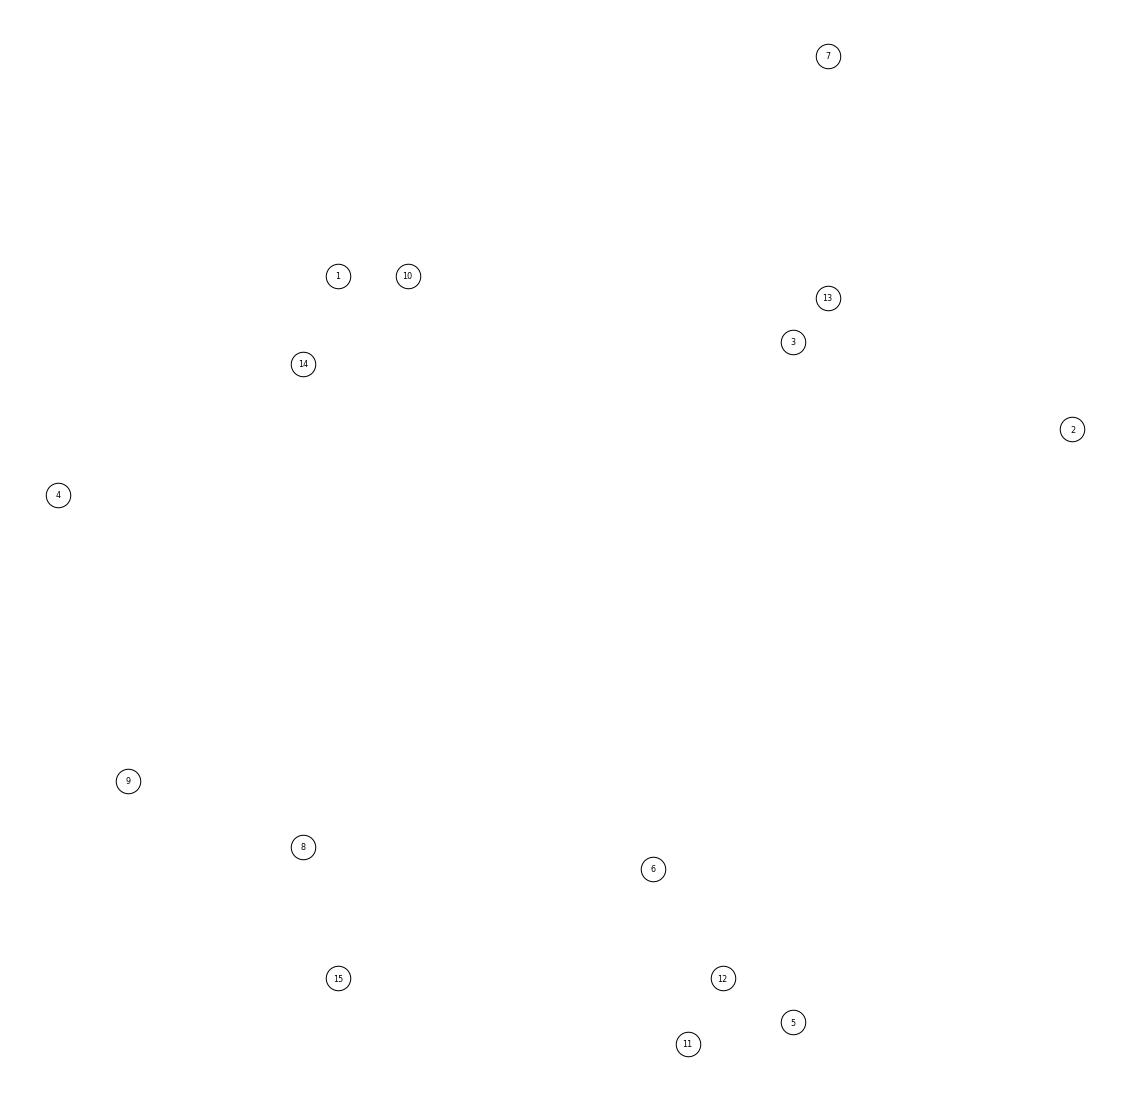

In [5]:
## the root node aka depot is the first node of the list


root = list(G.nodes())[0]

DrawInitG(G)


In [6]:
G.edges(data = True)

OutEdgeDataView([(1, 2, {'dist': 2217}), (1, 3, {'dist': 1343}), (1, 4, {'dist': 1290}), (1, 5, {'dist': 3650}), (1, 6, {'dist': 2853}), (1, 7, {'dist': 1720}), (1, 8, {'dist': 2607}), (1, 9, {'dist': 2385}), (1, 10, {'dist': 207}), (1, 11, {'dist': 3650}), (1, 12, {'dist': 3388}), (1, 13, {'dist': 1413}), (1, 14, {'dist': 412}), (1, 15, {'dist': 3210}), (2, 1, {'dist': 2220}), (2, 3, {'dist': 899}), (2, 4, {'dist': 2918}), (2, 5, {'dist': 2825}), (2, 6, {'dist': 2342}), (2, 7, {'dist': 1842}), (2, 8, {'dist': 2914}), (2, 9, {'dist': 3142}), (2, 10, {'dist': 2030}), (2, 11, {'dist': 3018}), (2, 12, {'dist': 2696}), (2, 13, {'dist': 929}), (2, 14, {'dist': 2229}), (2, 15, {'dist': 3267}), (3, 1, {'dist': 1338}), (3, 2, {'dist': 903}), (3, 4, {'dist': 2218}), (3, 5, {'dist': 3100}), (3, 6, {'dist': 2440}), (3, 7, {'dist': 1311}), (3, 8, {'dist': 2693}), (3, 9, {'dist': 2758}), (3, 10, {'dist': 1148}), (3, 11, {'dist': 3221}), (3, 12, {'dist': 2915}), (3, 13, {'dist': 232}), (3, 14, {'dis

#### Nodes attruibutes
Each node has 3 attributes demand/supply, one for each product that customers can request or supply\
in the model above this attribute is called $q^k_{i}$  ---> quantity of product $k$ that the customer $i$ require or provides

In [7]:
#Nodes of the ndes with attributes
#Each node has 3 attributes demand/supply, one for each product that customers can request or supply

G.nodes(data=True)

NodeDataView({1: {'y': 36, 'x': 9, 'demand/supply1': 0, 'demand/supply2': 0, 'demand/supply3': 0, 'demand/supply4': 0, 'demand/supply5': 0, 'demand/supply6': 0, 'demand/supply7': 0}, 2: {'y': 29, 'x': 30, 'demand/supply1': 1, 'demand/supply2': 0, 'demand/supply3': 1, 'demand/supply4': 2, 'demand/supply5': 2, 'demand/supply6': 2, 'demand/supply7': 1}, 3: {'y': 33, 'x': 22, 'demand/supply1': 0, 'demand/supply2': 1, 'demand/supply3': 0, 'demand/supply4': 3, 'demand/supply5': 0, 'demand/supply6': 2, 'demand/supply7': 0}, 4: {'y': 26, 'x': 1, 'demand/supply1': -2, 'demand/supply2': -1, 'demand/supply3': 1, 'demand/supply4': -1, 'demand/supply5': 1, 'demand/supply6': 2, 'demand/supply7': 0}, 5: {'y': 2, 'x': 22, 'demand/supply1': 2, 'demand/supply2': 2, 'demand/supply3': -1, 'demand/supply4': -2, 'demand/supply5': -1, 'demand/supply6': -1, 'demand/supply7': -2}, 6: {'y': 9, 'x': 18, 'demand/supply1': 0, 'demand/supply2': -1, 'demand/supply3': 1, 'demand/supply4': 1, 'demand/supply5': 1, 'dem

####  Inizialization of gurobi model and declaration of variable $x$
Variable $x$ is defined on each arc $(i,j)$ of $G$ and the type is binary \
Definition of objective funcion $\min \sum_{a \in A}c_ax_a\$

In [8]:
pdtsp = gb.Model()

x = pdtsp.addVars(G.edges(),\
                 obj=[G[i][j]['dist']\
                      for i,j in G.edges()],\
             vtype=gb.GRB.BINARY, name='x')



--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-07-16
Using license file C:\Users\gabri\gurobi.lic


In [9]:
#List of products
products = [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13]


#Capacity of vehicle
Q = 27

#also the capacity could be dtermined a posteriore once the model has been optimized, in this case fix Q with a large value

In [10]:
#Estract dictionaries of request/supply for each product

    
dem1 = nx.get_node_attributes(G,'demand/supply1')
dem2 = nx.get_node_attributes(G,'demand/supply2')
dem3 = nx.get_node_attributes(G,'demand/supply3')
dem4 = nx.get_node_attributes(G,'demand/supply4')
dem5 = nx.get_node_attributes(G,'demand/supply5')
dem6 = nx.get_node_attributes(G,'demand/supply6')
dem7 = nx.get_node_attributes(G,'demand/supply7')
dem8 = nx.get_node_attributes(G,'demand/supply8')
dem9 = nx.get_node_attributes(G,'demand/supply9')
dem10 = nx.get_node_attributes(G,'demand/supply10')
dem11 = nx.get_node_attributes(G,'demand/supply11')
dem12 = nx.get_node_attributes(G,'demand/supply12')
dem13 = nx.get_node_attributes(G,'demand/supply13')




In [11]:
#Variable f defined on each arc of the graph and each product

f = pdtsp.addVars(G.edges(), products, ub=Q, lb = 0, vtype=gb.GRB.CONTINUOUS, \
                         name='f')

In [12]:
f

{(1, 2, 1): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 2): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 3): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 4): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 5): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 6): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 7): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 8): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 9): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 10): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 11): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 12): <gurobi.Var *Awaiting Model Update*>,
 (1, 2, 13): <gurobi.Var *Awaiting Model Update*>,
 (1, 3, 1): <gurobi.Var *Awaiting Model Update*>,
 (1, 3, 2): <gurobi.Var *Awaiting Model Update*>,
 (1, 3, 3): <gurobi.Var *Awaiting Model Update*>,
 (1, 3, 4): <gurobi.Var *Awaiting Model Update*>,
 (1, 3, 5): <gurobi.Var *Awaiting Model Update*>,
 (1, 3, 6): <gurobi.Var *Awaiting Model Update*>,
 (1, 3, 7): <gurobi.Var *Awaiting Model Update

#### Constraint 1 and 2 ----> FS - RS
Since in the solution route each customer must be visited exactly one time, we need two constraint.\
1 - Sum af all outgoing arcs must be equal to one for each node in the graph\
2 - Sum af all ingoing arcs must be equal to one for each node in the graph\
\
\
1 - $x(\delta^-(\{i\})) = 1  \quad \forall i \in V$\
2 - $x(\delta^+(\{i\})) = 1  \quad \forall i \in V$

In [13]:
# Sum of all outgoing arcs must be equal 1 for each node in the graph

pdtsp.addConstrs((x.sum(i,'*') == 1 \
                 for i in G.nodes()), name='FS')

pdtsp.update()
pdtsp.write('pdtsp_lazy.lp')

In [14]:
# Sum of all ingoing arcs must be equal 1 for each node in the graph

pdtsp.addConstrs((x.sum('*',i) == 1 \
                 for i in G.nodes()), name='RS')

pdtsp.update()
pdtsp.write('pdtsp_lazy.lp')

In [15]:
print(*powerset(G.nodes())) ## testing the powerset method

() (1,) (2,) (3,) (4,) (5,) (6,) (7,) (8,) (9,) (10,) (11,) (12,) (13,) (14,) (15,) (1, 2) (1, 3) (1, 4) (1, 5) (1, 6) (1, 7) (1, 8) (1, 9) (1, 10) (1, 11) (1, 12) (1, 13) (1, 14) (1, 15) (2, 3) (2, 4) (2, 5) (2, 6) (2, 7) (2, 8) (2, 9) (2, 10) (2, 11) (2, 12) (2, 13) (2, 14) (2, 15) (3, 4) (3, 5) (3, 6) (3, 7) (3, 8) (3, 9) (3, 10) (3, 11) (3, 12) (3, 13) (3, 14) (3, 15) (4, 5) (4, 6) (4, 7) (4, 8) (4, 9) (4, 10) (4, 11) (4, 12) (4, 13) (4, 14) (4, 15) (5, 6) (5, 7) (5, 8) (5, 9) (5, 10) (5, 11) (5, 12) (5, 13) (5, 14) (5, 15) (6, 7) (6, 8) (6, 9) (6, 10) (6, 11) (6, 12) (6, 13) (6, 14) (6, 15) (7, 8) (7, 9) (7, 10) (7, 11) (7, 12) (7, 13) (7, 14) (7, 15) (8, 9) (8, 10) (8, 11) (8, 12) (8, 13) (8, 14) (8, 15) (9, 10) (9, 11) (9, 12) (9, 13) (9, 14) (9, 15) (10, 11) (10, 12) (10, 13) (10, 14) (10, 15) (11, 12) (11, 13) (11, 14) (11, 15) (12, 13) (12, 14) (12, 15) (13, 14) (13, 15) (14, 15) (1, 2, 3) (1, 2, 4) (1, 2, 5) (1, 2, 6) (1, 2, 7) (1, 2, 8) (1, 2, 9) (1, 2, 10) (1, 2, 11) (1, 2

 (6, 7, 8, 13) (6, 7, 8, 14) (6, 7, 8, 15) (6, 7, 9, 10) (6, 7, 9, 11) (6, 7, 9, 12) (6, 7, 9, 13) (6, 7, 9, 14) (6, 7, 9, 15) (6, 7, 10, 11) (6, 7, 10, 12) (6, 7, 10, 13) (6, 7, 10, 14) (6, 7, 10, 15) (6, 7, 11, 12) (6, 7, 11, 13) (6, 7, 11, 14) (6, 7, 11, 15) (6, 7, 12, 13) (6, 7, 12, 14) (6, 7, 12, 15) (6, 7, 13, 14) (6, 7, 13, 15) (6, 7, 14, 15) (6, 8, 9, 10) (6, 8, 9, 11) (6, 8, 9, 12) (6, 8, 9, 13) (6, 8, 9, 14) (6, 8, 9, 15) (6, 8, 10, 11) (6, 8, 10, 12) (6, 8, 10, 13) (6, 8, 10, 14) (6, 8, 10, 15) (6, 8, 11, 12) (6, 8, 11, 13) (6, 8, 11, 14) (6, 8, 11, 15) (6, 8, 12, 13) (6, 8, 12, 14) (6, 8, 12, 15) (6, 8, 13, 14) (6, 8, 13, 15) (6, 8, 14, 15) (6, 9, 10, 11) (6, 9, 10, 12) (6, 9, 10, 13) (6, 9, 10, 14) (6, 9, 10, 15) (6, 9, 11, 12) (6, 9, 11, 13) (6, 9, 11, 14) (6, 9, 11, 15) (6, 9, 12, 13) (6, 9, 12, 14) (6, 9, 12, 15) (6, 9, 13, 14) (6, 9, 13, 15) (6, 9, 14, 15) (6, 10, 11, 12) (6, 10, 11, 13) (6, 10, 11, 14) (6, 10, 11, 15) (6, 10, 12, 13) (6, 10, 12, 14) (6, 10, 12, 15) (6

 (2, 4, 5, 7, 14) (2, 4, 5, 7, 15) (2, 4, 5, 8, 9) (2, 4, 5, 8, 10) (2, 4, 5, 8, 11) (2, 4, 5, 8, 12) (2, 4, 5, 8, 13) (2, 4, 5, 8, 14) (2, 4, 5, 8, 15) (2, 4, 5, 9, 10) (2, 4, 5, 9, 11) (2, 4, 5, 9, 12) (2, 4, 5, 9, 13) (2, 4, 5, 9, 14) (2, 4, 5, 9, 15) (2, 4, 5, 10, 11) (2, 4, 5, 10, 12) (2, 4, 5, 10, 13) (2, 4, 5, 10, 14) (2, 4, 5, 10, 15) (2, 4, 5, 11, 12) (2, 4, 5, 11, 13) (2, 4, 5, 11, 14) (2, 4, 5, 11, 15) (2, 4, 5, 12, 13) (2, 4, 5, 12, 14) (2, 4, 5, 12, 15) (2, 4, 5, 13, 14) (2, 4, 5, 13, 15) (2, 4, 5, 14, 15) (2, 4, 6, 7, 8) (2, 4, 6, 7, 9) (2, 4, 6, 7, 10) (2, 4, 6, 7, 11) (2, 4, 6, 7, 12) (2, 4, 6, 7, 13) (2, 4, 6, 7, 14) (2, 4, 6, 7, 15) (2, 4, 6, 8, 9) (2, 4, 6, 8, 10) (2, 4, 6, 8, 11) (2, 4, 6, 8, 12) (2, 4, 6, 8, 13) (2, 4, 6, 8, 14) (2, 4, 6, 8, 15) (2, 4, 6, 9, 10) (2, 4, 6, 9, 11) (2, 4, 6, 9, 12) (2, 4, 6, 9, 13) (2, 4, 6, 9, 14) (2, 4, 6, 9, 15) (2, 4, 6, 10, 11) (2, 4, 6, 10, 12) (2, 4, 6, 10, 13) (2, 4, 6, 10, 14) (2, 4, 6, 10, 15) (2, 4, 6, 11, 12) (2, 4, 6, 11,

(5, 11, 12, 13, 15) (5, 11, 12, 14, 15) (5, 11, 13, 14, 15) (5, 12, 13, 14, 15) (6, 7, 8, 9, 10) (6, 7, 8, 9, 11) (6, 7, 8, 9, 12) (6, 7, 8, 9, 13) (6, 7, 8, 9, 14) (6, 7, 8, 9, 15) (6, 7, 8, 10, 11) (6, 7, 8, 10, 12) (6, 7, 8, 10, 13) (6, 7, 8, 10, 14) (6, 7, 8, 10, 15) (6, 7, 8, 11, 12) (6, 7, 8, 11, 13) (6, 7, 8, 11, 14) (6, 7, 8, 11, 15) (6, 7, 8, 12, 13) (6, 7, 8, 12, 14) (6, 7, 8, 12, 15) (6, 7, 8, 13, 14) (6, 7, 8, 13, 15) (6, 7, 8, 14, 15) (6, 7, 9, 10, 11) (6, 7, 9, 10, 12) (6, 7, 9, 10, 13) (6, 7, 9, 10, 14) (6, 7, 9, 10, 15) (6, 7, 9, 11, 12) (6, 7, 9, 11, 13) (6, 7, 9, 11, 14) (6, 7, 9, 11, 15) (6, 7, 9, 12, 13) (6, 7, 9, 12, 14) (6, 7, 9, 12, 15) (6, 7, 9, 13, 14) (6, 7, 9, 13, 15) (6, 7, 9, 14, 15) (6, 7, 10, 11, 12) (6, 7, 10, 11, 13) (6, 7, 10, 11, 14) (6, 7, 10, 11, 15) (6, 7, 10, 12, 13) (6, 7, 10, 12, 14) (6, 7, 10, 12, 15) (6, 7, 10, 13, 14) (6, 7, 10, 13, 15) (6, 7, 10, 14, 15) (6, 7, 11, 12, 13) (6, 7, 11, 12, 14) (6, 7, 11, 12, 15) (6, 7, 11, 13, 14) (6, 7, 11, 1

(1, 4, 5, 11, 14, 15) (1, 4, 5, 12, 13, 14) (1, 4, 5, 12, 13, 15) (1, 4, 5, 12, 14, 15) (1, 4, 5, 13, 14, 15) (1, 4, 6, 7, 8, 9) (1, 4, 6, 7, 8, 10) (1, 4, 6, 7, 8, 11) (1, 4, 6, 7, 8, 12) (1, 4, 6, 7, 8, 13) (1, 4, 6, 7, 8, 14) (1, 4, 6, 7, 8, 15) (1, 4, 6, 7, 9, 10) (1, 4, 6, 7, 9, 11) (1, 4, 6, 7, 9, 12) (1, 4, 6, 7, 9, 13) (1, 4, 6, 7, 9, 14) (1, 4, 6, 7, 9, 15) (1, 4, 6, 7, 10, 11) (1, 4, 6, 7, 10, 12) (1, 4, 6, 7, 10, 13) (1, 4, 6, 7, 10, 14) (1, 4, 6, 7, 10, 15) (1, 4, 6, 7, 11, 12) (1, 4, 6, 7, 11, 13) (1, 4, 6, 7, 11, 14) (1, 4, 6, 7, 11, 15) (1, 4, 6, 7, 12, 13) (1, 4, 6, 7, 12, 14) (1, 4, 6, 7, 12, 15) (1, 4, 6, 7, 13, 14) (1, 4, 6, 7, 13, 15) (1, 4, 6, 7, 14, 15) (1, 4, 6, 8, 9, 10) (1, 4, 6, 8, 9, 11) (1, 4, 6, 8, 9, 12) (1, 4, 6, 8, 9, 13) (1, 4, 6, 8, 9, 14) (1, 4, 6, 8, 9, 15) (1, 4, 6, 8, 10, 11) (1, 4, 6, 8, 10, 12) (1, 4, 6, 8, 10, 13) (1, 4, 6, 8, 10, 14) (1, 4, 6, 8, 10, 15) (1, 4, 6, 8, 11, 12) (1, 4, 6, 8, 11, 13) (1, 4, 6, 8, 11, 14) (1, 4, 6, 8, 11, 15) (1, 4, 

 (2, 5, 7, 11, 12, 14) (2, 5, 7, 11, 12, 15) (2, 5, 7, 11, 13, 14) (2, 5, 7, 11, 13, 15) (2, 5, 7, 11, 14, 15) (2, 5, 7, 12, 13, 14) (2, 5, 7, 12, 13, 15) (2, 5, 7, 12, 14, 15) (2, 5, 7, 13, 14, 15) (2, 5, 8, 9, 10, 11) (2, 5, 8, 9, 10, 12) (2, 5, 8, 9, 10, 13) (2, 5, 8, 9, 10, 14) (2, 5, 8, 9, 10, 15) (2, 5, 8, 9, 11, 12) (2, 5, 8, 9, 11, 13) (2, 5, 8, 9, 11, 14) (2, 5, 8, 9, 11, 15) (2, 5, 8, 9, 12, 13) (2, 5, 8, 9, 12, 14) (2, 5, 8, 9, 12, 15) (2, 5, 8, 9, 13, 14) (2, 5, 8, 9, 13, 15) (2, 5, 8, 9, 14, 15) (2, 5, 8, 10, 11, 12) (2, 5, 8, 10, 11, 13) (2, 5, 8, 10, 11, 14) (2, 5, 8, 10, 11, 15) (2, 5, 8, 10, 12, 13) (2, 5, 8, 10, 12, 14) (2, 5, 8, 10, 12, 15) (2, 5, 8, 10, 13, 14) (2, 5, 8, 10, 13, 15) (2, 5, 8, 10, 14, 15) (2, 5, 8, 11, 12, 13) (2, 5, 8, 11, 12, 14) (2, 5, 8, 11, 12, 15) (2, 5, 8, 11, 13, 14) (2, 5, 8, 11, 13, 15) (2, 5, 8, 11, 14, 15) (2, 5, 8, 12, 13, 14) (2, 5, 8, 12, 13, 15) (2, 5, 8, 12, 14, 15) (2, 5, 8, 13, 14, 15) (2, 5, 9, 10, 11, 12) (2, 5, 9, 10, 11, 13) (2

(5, 8, 9, 10, 13, 15) (5, 8, 9, 10, 14, 15) (5, 8, 9, 11, 12, 13) (5, 8, 9, 11, 12, 14) (5, 8, 9, 11, 12, 15) (5, 8, 9, 11, 13, 14) (5, 8, 9, 11, 13, 15) (5, 8, 9, 11, 14, 15) (5, 8, 9, 12, 13, 14) (5, 8, 9, 12, 13, 15) (5, 8, 9, 12, 14, 15) (5, 8, 9, 13, 14, 15) (5, 8, 10, 11, 12, 13) (5, 8, 10, 11, 12, 14) (5, 8, 10, 11, 12, 15) (5, 8, 10, 11, 13, 14) (5, 8, 10, 11, 13, 15) (5, 8, 10, 11, 14, 15) (5, 8, 10, 12, 13, 14) (5, 8, 10, 12, 13, 15) (5, 8, 10, 12, 14, 15) (5, 8, 10, 13, 14, 15) (5, 8, 11, 12, 13, 14) (5, 8, 11, 12, 13, 15) (5, 8, 11, 12, 14, 15) (5, 8, 11, 13, 14, 15) (5, 8, 12, 13, 14, 15) (5, 9, 10, 11, 12, 13) (5, 9, 10, 11, 12, 14) (5, 9, 10, 11, 12, 15) (5, 9, 10, 11, 13, 14) (5, 9, 10, 11, 13, 15) (5, 9, 10, 11, 14, 15) (5, 9, 10, 12, 13, 14) (5, 9, 10, 12, 13, 15) (5, 9, 10, 12, 14, 15) (5, 9, 10, 13, 14, 15) (5, 9, 11, 12, 13, 14) (5, 9, 11, 12, 13, 15) (5, 9, 11, 12, 14, 15) (5, 9, 11, 13, 14, 15) (5, 9, 12, 13, 14, 15) (5, 10, 11, 12, 13, 14) (5, 10, 11, 12, 13, 15

(1, 3, 4, 5, 8, 14, 15) (1, 3, 4, 5, 9, 10, 11) (1, 3, 4, 5, 9, 10, 12) (1, 3, 4, 5, 9, 10, 13) (1, 3, 4, 5, 9, 10, 14) (1, 3, 4, 5, 9, 10, 15) (1, 3, 4, 5, 9, 11, 12) (1, 3, 4, 5, 9, 11, 13) (1, 3, 4, 5, 9, 11, 14) (1, 3, 4, 5, 9, 11, 15) (1, 3, 4, 5, 9, 12, 13) (1, 3, 4, 5, 9, 12, 14) (1, 3, 4, 5, 9, 12, 15) (1, 3, 4, 5, 9, 13, 14) (1, 3, 4, 5, 9, 13, 15) (1, 3, 4, 5, 9, 14, 15) (1, 3, 4, 5, 10, 11, 12) (1, 3, 4, 5, 10, 11, 13) (1, 3, 4, 5, 10, 11, 14) (1, 3, 4, 5, 10, 11, 15) (1, 3, 4, 5, 10, 12, 13) (1, 3, 4, 5, 10, 12, 14) (1, 3, 4, 5, 10, 12, 15) (1, 3, 4, 5, 10, 13, 14) (1, 3, 4, 5, 10, 13, 15) (1, 3, 4, 5, 10, 14, 15) (1, 3, 4, 5, 11, 12, 13) (1, 3, 4, 5, 11, 12, 14) (1, 3, 4, 5, 11, 12, 15) (1, 3, 4, 5, 11, 13, 14) (1, 3, 4, 5, 11, 13, 15) (1, 3, 4, 5, 11, 14, 15) (1, 3, 4, 5, 12, 13, 14) (1, 3, 4, 5, 12, 13, 15) (1, 3, 4, 5, 12, 14, 15) (1, 3, 4, 5, 13, 14, 15) (1, 3, 4, 6, 7, 8, 9) (1, 3, 4, 6, 7, 8, 10) (1, 3, 4, 6, 7, 8, 11) (1, 3, 4, 6, 7, 8, 12) (1, 3, 4, 6, 7, 8, 13) (1

(1, 7, 8, 10, 11, 12, 13) (1, 7, 8, 10, 11, 12, 14) (1, 7, 8, 10, 11, 12, 15) (1, 7, 8, 10, 11, 13, 14) (1, 7, 8, 10, 11, 13, 15) (1, 7, 8, 10, 11, 14, 15) (1, 7, 8, 10, 12, 13, 14) (1, 7, 8, 10, 12, 13, 15) (1, 7, 8, 10, 12, 14, 15) (1, 7, 8, 10, 13, 14, 15) (1, 7, 8, 11, 12, 13, 14) (1, 7, 8, 11, 12, 13, 15) (1, 7, 8, 11, 12, 14, 15) (1, 7, 8, 11, 13, 14, 15) (1, 7, 8, 12, 13, 14, 15) (1, 7, 9, 10, 11, 12, 13) (1, 7, 9, 10, 11, 12, 14) (1, 7, 9, 10, 11, 12, 15) (1, 7, 9, 10, 11, 13, 14) (1, 7, 9, 10, 11, 13, 15) (1, 7, 9, 10, 11, 14, 15) (1, 7, 9, 10, 12, 13, 14) (1, 7, 9, 10, 12, 13, 15) (1, 7, 9, 10, 12, 14, 15) (1, 7, 9, 10, 13, 14, 15) (1, 7, 9, 11, 12, 13, 14) (1, 7, 9, 11, 12, 13, 15) (1, 7, 9, 11, 12, 14, 15) (1, 7, 9, 11, 13, 14, 15) (1, 7, 9, 12, 13, 14, 15) (1, 7, 10, 11, 12, 13, 14) (1, 7, 10, 11, 12, 13, 15) (1, 7, 10, 11, 12, 14, 15) (1, 7, 10, 11, 13, 14, 15) (1, 7, 10, 12, 13, 14, 15) (1, 7, 11, 12, 13, 14, 15) (1, 8, 9, 10, 11, 12, 13) (1, 8, 9, 10, 11, 12, 14) (1, 8,

(3, 4, 5, 6, 9, 13, 14) (3, 4, 5, 6, 9, 13, 15) (3, 4, 5, 6, 9, 14, 15) (3, 4, 5, 6, 10, 11, 12) (3, 4, 5, 6, 10, 11, 13) (3, 4, 5, 6, 10, 11, 14) (3, 4, 5, 6, 10, 11, 15) (3, 4, 5, 6, 10, 12, 13) (3, 4, 5, 6, 10, 12, 14) (3, 4, 5, 6, 10, 12, 15) (3, 4, 5, 6, 10, 13, 14) (3, 4, 5, 6, 10, 13, 15) (3, 4, 5, 6, 10, 14, 15) (3, 4, 5, 6, 11, 12, 13) (3, 4, 5, 6, 11, 12, 14) (3, 4, 5, 6, 11, 12, 15) (3, 4, 5, 6, 11, 13, 14) (3, 4, 5, 6, 11, 13, 15) (3, 4, 5, 6, 11, 14, 15) (3, 4, 5, 6, 12, 13, 14) (3, 4, 5, 6, 12, 13, 15) (3, 4, 5, 6, 12, 14, 15) (3, 4, 5, 6, 13, 14, 15) (3, 4, 5, 7, 8, 9, 10) (3, 4, 5, 7, 8, 9, 11) (3, 4, 5, 7, 8, 9, 12) (3, 4, 5, 7, 8, 9, 13) (3, 4, 5, 7, 8, 9, 14) (3, 4, 5, 7, 8, 9, 15) (3, 4, 5, 7, 8, 10, 11) (3, 4, 5, 7, 8, 10, 12) (3, 4, 5, 7, 8, 10, 13) (3, 4, 5, 7, 8, 10, 14) (3, 4, 5, 7, 8, 10, 15) (3, 4, 5, 7, 8, 11, 12) (3, 4, 5, 7, 8, 11, 13) (3, 4, 5, 7, 8, 11, 14) (3, 4, 5, 7, 8, 11, 15) (3, 4, 5, 7, 8, 12, 13) (3, 4, 5, 7, 8, 12, 14) (3, 4, 5, 7, 8, 12, 15) (3

 (1, 2, 3, 4, 7, 10, 13, 15) (1, 2, 3, 4, 7, 10, 14, 15) (1, 2, 3, 4, 7, 11, 12, 13) (1, 2, 3, 4, 7, 11, 12, 14) (1, 2, 3, 4, 7, 11, 12, 15) (1, 2, 3, 4, 7, 11, 13, 14) (1, 2, 3, 4, 7, 11, 13, 15) (1, 2, 3, 4, 7, 11, 14, 15) (1, 2, 3, 4, 7, 12, 13, 14) (1, 2, 3, 4, 7, 12, 13, 15) (1, 2, 3, 4, 7, 12, 14, 15) (1, 2, 3, 4, 7, 13, 14, 15) (1, 2, 3, 4, 8, 9, 10, 11) (1, 2, 3, 4, 8, 9, 10, 12) (1, 2, 3, 4, 8, 9, 10, 13) (1, 2, 3, 4, 8, 9, 10, 14) (1, 2, 3, 4, 8, 9, 10, 15) (1, 2, 3, 4, 8, 9, 11, 12) (1, 2, 3, 4, 8, 9, 11, 13) (1, 2, 3, 4, 8, 9, 11, 14) (1, 2, 3, 4, 8, 9, 11, 15) (1, 2, 3, 4, 8, 9, 12, 13) (1, 2, 3, 4, 8, 9, 12, 14) (1, 2, 3, 4, 8, 9, 12, 15) (1, 2, 3, 4, 8, 9, 13, 14) (1, 2, 3, 4, 8, 9, 13, 15) (1, 2, 3, 4, 8, 9, 14, 15) (1, 2, 3, 4, 8, 10, 11, 12) (1, 2, 3, 4, 8, 10, 11, 13) (1, 2, 3, 4, 8, 10, 11, 14) (1, 2, 3, 4, 8, 10, 11, 15) (1, 2, 3, 4, 8, 10, 12, 13) (1, 2, 3, 4, 8, 10, 12, 14) (1, 2, 3, 4, 8, 10, 12, 15) (1, 2, 3, 4, 8, 10, 13, 14) (1, 2, 3, 4, 8, 10, 13, 15) (1, 2,

(1, 3, 4, 6, 7, 8, 11, 12) (1, 3, 4, 6, 7, 8, 11, 13) (1, 3, 4, 6, 7, 8, 11, 14) (1, 3, 4, 6, 7, 8, 11, 15) (1, 3, 4, 6, 7, 8, 12, 13) (1, 3, 4, 6, 7, 8, 12, 14) (1, 3, 4, 6, 7, 8, 12, 15) (1, 3, 4, 6, 7, 8, 13, 14) (1, 3, 4, 6, 7, 8, 13, 15) (1, 3, 4, 6, 7, 8, 14, 15) (1, 3, 4, 6, 7, 9, 10, 11) (1, 3, 4, 6, 7, 9, 10, 12) (1, 3, 4, 6, 7, 9, 10, 13) (1, 3, 4, 6, 7, 9, 10, 14) (1, 3, 4, 6, 7, 9, 10, 15) (1, 3, 4, 6, 7, 9, 11, 12) (1, 3, 4, 6, 7, 9, 11, 13) (1, 3, 4, 6, 7, 9, 11, 14) (1, 3, 4, 6, 7, 9, 11, 15) (1, 3, 4, 6, 7, 9, 12, 13) (1, 3, 4, 6, 7, 9, 12, 14) (1, 3, 4, 6, 7, 9, 12, 15) (1, 3, 4, 6, 7, 9, 13, 14) (1, 3, 4, 6, 7, 9, 13, 15) (1, 3, 4, 6, 7, 9, 14, 15) (1, 3, 4, 6, 7, 10, 11, 12) (1, 3, 4, 6, 7, 10, 11, 13) (1, 3, 4, 6, 7, 10, 11, 14) (1, 3, 4, 6, 7, 10, 11, 15) (1, 3, 4, 6, 7, 10, 12, 13) (1, 3, 4, 6, 7, 10, 12, 14) (1, 3, 4, 6, 7, 10, 12, 15) (1, 3, 4, 6, 7, 10, 13, 14) (1, 3, 4, 6, 7, 10, 13, 15) (1, 3, 4, 6, 7, 10, 14, 15) (1, 3, 4, 6, 7, 11, 12, 13) (1, 3, 4, 6, 7, 1

 (2, 3, 4, 5, 6, 9, 10, 13) (2, 3, 4, 5, 6, 9, 10, 14) (2, 3, 4, 5, 6, 9, 10, 15) (2, 3, 4, 5, 6, 9, 11, 12) (2, 3, 4, 5, 6, 9, 11, 13) (2, 3, 4, 5, 6, 9, 11, 14) (2, 3, 4, 5, 6, 9, 11, 15) (2, 3, 4, 5, 6, 9, 12, 13) (2, 3, 4, 5, 6, 9, 12, 14) (2, 3, 4, 5, 6, 9, 12, 15) (2, 3, 4, 5, 6, 9, 13, 14) (2, 3, 4, 5, 6, 9, 13, 15) (2, 3, 4, 5, 6, 9, 14, 15) (2, 3, 4, 5, 6, 10, 11, 12) (2, 3, 4, 5, 6, 10, 11, 13) (2, 3, 4, 5, 6, 10, 11, 14) (2, 3, 4, 5, 6, 10, 11, 15) (2, 3, 4, 5, 6, 10, 12, 13) (2, 3, 4, 5, 6, 10, 12, 14) (2, 3, 4, 5, 6, 10, 12, 15) (2, 3, 4, 5, 6, 10, 13, 14) (2, 3, 4, 5, 6, 10, 13, 15) (2, 3, 4, 5, 6, 10, 14, 15) (2, 3, 4, 5, 6, 11, 12, 13) (2, 3, 4, 5, 6, 11, 12, 14) (2, 3, 4, 5, 6, 11, 12, 15) (2, 3, 4, 5, 6, 11, 13, 14) (2, 3, 4, 5, 6, 11, 13, 15) (2, 3, 4, 5, 6, 11, 14, 15) (2, 3, 4, 5, 6, 12, 13, 14) (2, 3, 4, 5, 6, 12, 13, 15) (2, 3, 4, 5, 6, 12, 14, 15) (2, 3, 4, 5, 6, 13, 14, 15) (2, 3, 4, 5, 7, 8, 9, 10) (2, 3, 4, 5, 7, 8, 9, 11) (2, 3, 4, 5, 7, 8, 9, 12) (2, 3, 4, 

(2, 6, 7, 8, 9, 11, 13, 14) (2, 6, 7, 8, 9, 11, 13, 15) (2, 6, 7, 8, 9, 11, 14, 15) (2, 6, 7, 8, 9, 12, 13, 14) (2, 6, 7, 8, 9, 12, 13, 15) (2, 6, 7, 8, 9, 12, 14, 15) (2, 6, 7, 8, 9, 13, 14, 15) (2, 6, 7, 8, 10, 11, 12, 13) (2, 6, 7, 8, 10, 11, 12, 14) (2, 6, 7, 8, 10, 11, 12, 15) (2, 6, 7, 8, 10, 11, 13, 14) (2, 6, 7, 8, 10, 11, 13, 15) (2, 6, 7, 8, 10, 11, 14, 15) (2, 6, 7, 8, 10, 12, 13, 14) (2, 6, 7, 8, 10, 12, 13, 15) (2, 6, 7, 8, 10, 12, 14, 15) (2, 6, 7, 8, 10, 13, 14, 15) (2, 6, 7, 8, 11, 12, 13, 14) (2, 6, 7, 8, 11, 12, 13, 15) (2, 6, 7, 8, 11, 12, 14, 15) (2, 6, 7, 8, 11, 13, 14, 15) (2, 6, 7, 8, 12, 13, 14, 15) (2, 6, 7, 9, 10, 11, 12, 13) (2, 6, 7, 9, 10, 11, 12, 14) (2, 6, 7, 9, 10, 11, 12, 15) (2, 6, 7, 9, 10, 11, 13, 14) (2, 6, 7, 9, 10, 11, 13, 15) (2, 6, 7, 9, 10, 11, 14, 15) (2, 6, 7, 9, 10, 12, 13, 14) (2, 6, 7, 9, 10, 12, 13, 15) (2, 6, 7, 9, 10, 12, 14, 15) (2, 6, 7, 9, 10, 13, 14, 15) (2, 6, 7, 9, 11, 12, 13, 14) (2, 6, 7, 9, 11, 12, 13, 15) (2, 6, 7, 9, 11, 12, 

 (1, 2, 3, 4, 5, 6, 7, 11, 12) (1, 2, 3, 4, 5, 6, 7, 11, 13) (1, 2, 3, 4, 5, 6, 7, 11, 14) (1, 2, 3, 4, 5, 6, 7, 11, 15) (1, 2, 3, 4, 5, 6, 7, 12, 13) (1, 2, 3, 4, 5, 6, 7, 12, 14) (1, 2, 3, 4, 5, 6, 7, 12, 15) (1, 2, 3, 4, 5, 6, 7, 13, 14) (1, 2, 3, 4, 5, 6, 7, 13, 15) (1, 2, 3, 4, 5, 6, 7, 14, 15) (1, 2, 3, 4, 5, 6, 8, 9, 10) (1, 2, 3, 4, 5, 6, 8, 9, 11) (1, 2, 3, 4, 5, 6, 8, 9, 12) (1, 2, 3, 4, 5, 6, 8, 9, 13) (1, 2, 3, 4, 5, 6, 8, 9, 14) (1, 2, 3, 4, 5, 6, 8, 9, 15) (1, 2, 3, 4, 5, 6, 8, 10, 11) (1, 2, 3, 4, 5, 6, 8, 10, 12) (1, 2, 3, 4, 5, 6, 8, 10, 13) (1, 2, 3, 4, 5, 6, 8, 10, 14) (1, 2, 3, 4, 5, 6, 8, 10, 15) (1, 2, 3, 4, 5, 6, 8, 11, 12) (1, 2, 3, 4, 5, 6, 8, 11, 13) (1, 2, 3, 4, 5, 6, 8, 11, 14) (1, 2, 3, 4, 5, 6, 8, 11, 15) (1, 2, 3, 4, 5, 6, 8, 12, 13) (1, 2, 3, 4, 5, 6, 8, 12, 14) (1, 2, 3, 4, 5, 6, 8, 12, 15) (1, 2, 3, 4, 5, 6, 8, 13, 14) (1, 2, 3, 4, 5, 6, 8, 13, 15) (1, 2, 3, 4, 5, 6, 8, 14, 15) (1, 2, 3, 4, 5, 6, 9, 10, 11) (1, 2, 3, 4, 5, 6, 9, 10, 12) (1, 2, 3, 4, 5,

(1, 2, 5, 6, 9, 11, 13, 14, 15) (1, 2, 5, 6, 9, 12, 13, 14, 15) (1, 2, 5, 6, 10, 11, 12, 13, 14) (1, 2, 5, 6, 10, 11, 12, 13, 15) (1, 2, 5, 6, 10, 11, 12, 14, 15) (1, 2, 5, 6, 10, 11, 13, 14, 15) (1, 2, 5, 6, 10, 12, 13, 14, 15) (1, 2, 5, 6, 11, 12, 13, 14, 15) (1, 2, 5, 7, 8, 9, 10, 11, 12) (1, 2, 5, 7, 8, 9, 10, 11, 13) (1, 2, 5, 7, 8, 9, 10, 11, 14) (1, 2, 5, 7, 8, 9, 10, 11, 15) (1, 2, 5, 7, 8, 9, 10, 12, 13) (1, 2, 5, 7, 8, 9, 10, 12, 14) (1, 2, 5, 7, 8, 9, 10, 12, 15) (1, 2, 5, 7, 8, 9, 10, 13, 14) (1, 2, 5, 7, 8, 9, 10, 13, 15) (1, 2, 5, 7, 8, 9, 10, 14, 15) (1, 2, 5, 7, 8, 9, 11, 12, 13) (1, 2, 5, 7, 8, 9, 11, 12, 14) (1, 2, 5, 7, 8, 9, 11, 12, 15) (1, 2, 5, 7, 8, 9, 11, 13, 14) (1, 2, 5, 7, 8, 9, 11, 13, 15) (1, 2, 5, 7, 8, 9, 11, 14, 15) (1, 2, 5, 7, 8, 9, 12, 13, 14) (1, 2, 5, 7, 8, 9, 12, 13, 15) (1, 2, 5, 7, 8, 9, 12, 14, 15) (1, 2, 5, 7, 8, 9, 13, 14, 15) (1, 2, 5, 7, 8, 10, 11, 12, 13) (1, 2, 5, 7, 8, 10, 11, 12, 14) (1, 2, 5, 7, 8, 10, 11, 12, 15) (1, 2, 5, 7, 8, 10, 11

(2, 3, 4, 5, 7, 11, 13, 14, 15) (2, 3, 4, 5, 7, 12, 13, 14, 15) (2, 3, 4, 5, 8, 9, 10, 11, 12) (2, 3, 4, 5, 8, 9, 10, 11, 13) (2, 3, 4, 5, 8, 9, 10, 11, 14) (2, 3, 4, 5, 8, 9, 10, 11, 15) (2, 3, 4, 5, 8, 9, 10, 12, 13) (2, 3, 4, 5, 8, 9, 10, 12, 14) (2, 3, 4, 5, 8, 9, 10, 12, 15) (2, 3, 4, 5, 8, 9, 10, 13, 14) (2, 3, 4, 5, 8, 9, 10, 13, 15) (2, 3, 4, 5, 8, 9, 10, 14, 15) (2, 3, 4, 5, 8, 9, 11, 12, 13) (2, 3, 4, 5, 8, 9, 11, 12, 14) (2, 3, 4, 5, 8, 9, 11, 12, 15) (2, 3, 4, 5, 8, 9, 11, 13, 14) (2, 3, 4, 5, 8, 9, 11, 13, 15) (2, 3, 4, 5, 8, 9, 11, 14, 15) (2, 3, 4, 5, 8, 9, 12, 13, 14) (2, 3, 4, 5, 8, 9, 12, 13, 15) (2, 3, 4, 5, 8, 9, 12, 14, 15) (2, 3, 4, 5, 8, 9, 13, 14, 15) (2, 3, 4, 5, 8, 10, 11, 12, 13) (2, 3, 4, 5, 8, 10, 11, 12, 14) (2, 3, 4, 5, 8, 10, 11, 12, 15) (2, 3, 4, 5, 8, 10, 11, 13, 14) (2, 3, 4, 5, 8, 10, 11, 13, 15) (2, 3, 4, 5, 8, 10, 11, 14, 15) (2, 3, 4, 5, 8, 10, 12, 13, 14) (2, 3, 4, 5, 8, 10, 12, 13, 15) (2, 3, 4, 5, 8, 10, 12, 14, 15) (2, 3, 4, 5, 8, 10, 13, 14, 

(3, 6, 7, 8, 9, 10, 11, 12, 15) (3, 6, 7, 8, 9, 10, 11, 13, 14) (3, 6, 7, 8, 9, 10, 11, 13, 15) (3, 6, 7, 8, 9, 10, 11, 14, 15) (3, 6, 7, 8, 9, 10, 12, 13, 14) (3, 6, 7, 8, 9, 10, 12, 13, 15) (3, 6, 7, 8, 9, 10, 12, 14, 15) (3, 6, 7, 8, 9, 10, 13, 14, 15) (3, 6, 7, 8, 9, 11, 12, 13, 14) (3, 6, 7, 8, 9, 11, 12, 13, 15) (3, 6, 7, 8, 9, 11, 12, 14, 15) (3, 6, 7, 8, 9, 11, 13, 14, 15) (3, 6, 7, 8, 9, 12, 13, 14, 15) (3, 6, 7, 8, 10, 11, 12, 13, 14) (3, 6, 7, 8, 10, 11, 12, 13, 15) (3, 6, 7, 8, 10, 11, 12, 14, 15) (3, 6, 7, 8, 10, 11, 13, 14, 15) (3, 6, 7, 8, 10, 12, 13, 14, 15) (3, 6, 7, 8, 11, 12, 13, 14, 15) (3, 6, 7, 9, 10, 11, 12, 13, 14) (3, 6, 7, 9, 10, 11, 12, 13, 15) (3, 6, 7, 9, 10, 11, 12, 14, 15) (3, 6, 7, 9, 10, 11, 13, 14, 15) (3, 6, 7, 9, 10, 12, 13, 14, 15) (3, 6, 7, 9, 11, 12, 13, 14, 15) (3, 6, 7, 10, 11, 12, 13, 14, 15) (3, 6, 8, 9, 10, 11, 12, 13, 14) (3, 6, 8, 9, 10, 11, 12, 13, 15) (3, 6, 8, 9, 10, 11, 12, 14, 15) (3, 6, 8, 9, 10, 11, 13, 14, 15) (3, 6, 8, 9, 10, 12, 1

(1, 2, 5, 6, 9, 10, 11, 13, 14, 15) (1, 2, 5, 6, 9, 10, 12, 13, 14, 15) (1, 2, 5, 6, 9, 11, 12, 13, 14, 15) (1, 2, 5, 6, 10, 11, 12, 13, 14, 15) (1, 2, 5, 7, 8, 9, 10, 11, 12, 13) (1, 2, 5, 7, 8, 9, 10, 11, 12, 14) (1, 2, 5, 7, 8, 9, 10, 11, 12, 15) (1, 2, 5, 7, 8, 9, 10, 11, 13, 14) (1, 2, 5, 7, 8, 9, 10, 11, 13, 15) (1, 2, 5, 7, 8, 9, 10, 11, 14, 15) (1, 2, 5, 7, 8, 9, 10, 12, 13, 14) (1, 2, 5, 7, 8, 9, 10, 12, 13, 15) (1, 2, 5, 7, 8, 9, 10, 12, 14, 15) (1, 2, 5, 7, 8, 9, 10, 13, 14, 15) (1, 2, 5, 7, 8, 9, 11, 12, 13, 14) (1, 2, 5, 7, 8, 9, 11, 12, 13, 15) (1, 2, 5, 7, 8, 9, 11, 12, 14, 15) (1, 2, 5, 7, 8, 9, 11, 13, 14, 15) (1, 2, 5, 7, 8, 9, 12, 13, 14, 15) (1, 2, 5, 7, 8, 10, 11, 12, 13, 14) (1, 2, 5, 7, 8, 10, 11, 12, 13, 15) (1, 2, 5, 7, 8, 10, 11, 12, 14, 15) (1, 2, 5, 7, 8, 10, 11, 13, 14, 15) (1, 2, 5, 7, 8, 10, 12, 13, 14, 15) (1, 2, 5, 7, 8, 11, 12, 13, 14, 15) (1, 2, 5, 7, 9, 10, 11, 12, 13, 14) (1, 2, 5, 7, 9, 10, 11, 12, 13, 15) (1, 2, 5, 7, 9, 10, 11, 12, 14, 15) (1, 2,

(1, 2, 3, 5, 6, 8, 9, 11, 12, 13, 15) (1, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15) (1, 2, 3, 5, 6, 8, 9, 11, 13, 14, 15) (1, 2, 3, 5, 6, 8, 9, 12, 13, 14, 15) (1, 2, 3, 5, 6, 8, 10, 11, 12, 13, 14) (1, 2, 3, 5, 6, 8, 10, 11, 12, 13, 15) (1, 2, 3, 5, 6, 8, 10, 11, 12, 14, 15) (1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15) (1, 2, 3, 5, 6, 8, 10, 12, 13, 14, 15) (1, 2, 3, 5, 6, 8, 11, 12, 13, 14, 15) (1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 14) (1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 15) (1, 2, 3, 5, 6, 9, 10, 11, 12, 14, 15) (1, 2, 3, 5, 6, 9, 10, 11, 13, 14, 15) (1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 15) (1, 2, 3, 5, 6, 9, 11, 12, 13, 14, 15) (1, 2, 3, 5, 6, 10, 11, 12, 13, 14, 15) (1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13) (1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14) (1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 15) (1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 14) (1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 15) (1, 2, 3, 5, 7, 8, 9, 10, 11, 14, 15) (1, 2, 3, 5, 7, 8, 9, 10, 12, 13, 14) (1, 2, 3, 5, 7, 8, 9, 10, 12, 13, 15) (1, 2, 3, 5, 7, 8, 9, 10, 12, 14, 15

(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15) (1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15) (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15) (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15) (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15) (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)


#### Definition of 2  function used  for subsets constraints generation

#### Constraint 3 ---> subtour elmination constraint (SEC)

$\sum_{e \in E(S)}x_e\ \le |S| -1 \quad \forall S \subset N, |S| \ge 2 \;\; \text{(SEC)} $

In [16]:
pdtsp.addConstrs((x[i,j] + x[j,i] <= 1 for i,j in G.edges() if j > i), name='SUB2')

pdtsp.update()
pdtsp.write('pdtsp_lazy.lp')

In [17]:
pdtsp._graph = G
pdtsp._vars = x

In [18]:
def subtourseparation (G, x):
   
    for i,j in G.edges():
        G[i][j]['capacity'] = x[i,j].x
        
    for i in list(G.nodes())[1:]:
        cut_val, cut = nx.minimum_cut(G,1,i)
        
        if cut_val < 0.99999:
            print ('Found violated subtour inequality')
            
            if len(cut[0]) < len(cut[1]):
                subtour = (list(cut[0]))
            else:
                subtour = (list(cut[1]))
            print (subtour)
            return subtour
        
    return None

In [19]:
def SEC_lazy_callback (model, where):

        
    if where == gb.GRB.Callback.MIPSOL:
        
        x = model._vars
        xrel = model.cbGetSolution(x)
        G = model._graph
                
        for i,j in G.edges():
            G[i][j]['capacity'] = xrel[i,j]
        
        for i in list(G.nodes())[1:]:
            cut_val, cut = nx.minimum_cut(G,1,i)
        
            if cut_val < 0.99999:
                if len(cut[0]) < len(cut[1]):
                    subtour = (list(cut[0]))
                else:
                    subtour = (list(cut[1]))
        
                
                subtouredges = [(u,v) for u in subtour for v in subtour if u != v and G.has_edge(u,v)]
                
                #print (subtour, sum( xrel[i,j] for i,j in subtouredges))
                
                model.cbLazy(gb.quicksum(x[i,j] for i,j in subtouredges) <= len(subtour) - 1)
                break

##### Constraint 4 ---> flow balance constraint
for each node in the graph:\
for each product k the sum of the outgoing flow - sum of entering flow in the node must be equal to\
the demand of the node (customer) regard product k\
\
$\sum_{a \in \delta^+(i)} f^k_{a} - \sum_{a \in \delta^-(i)} f^k_{a} = q^k_i$  $\quad  \forall i \in V\,and\, k \in K$


In [20]:
# Flow balance constraint:

for v in G.nodes():
    if v != 1:
        for k in products:
            if k == 1:
                name = "Balance_"+str(v)+"_Prod_"+str(k)
                pdtsp.addConstr(f.sum(v,'*',k) - f.sum('*',v ,k) == dem1[v] , name)
            elif k == 2:
                name = "Balance_"+str(v)+"_Prod_"+str(k)
                pdtsp.addConstr(f.sum(v,'*',k) - f.sum('*',v ,k) == dem2[v] , name)
            else:
                name = "Balance_"+str(v)+"_Prod_"+str(k)
                pdtsp.addConstr(f.sum(v,'*',k) - f.sum('*',v ,k) == dem3[v] , name)
                

In [21]:
pdtsp.update()
pdtsp.write('pdtsp_lazy.lp')

#### Constraint 5 ---> Capacity constraint
For each arc the sum of flaw for each product must be less or equalt to the capacity of vehicle\
\
$ \sum_{k \in K}f^k_{a} \le Qx_a \quad \forall a \in A $


In [22]:
## Capacity constraint

for i,j in G.edges():
    pdtsp.addConstr(gb.quicksum(f[i,j,k] for k in products) <= Q*x[i,j], 'loadcapacity'+ str(i) + str(j))
            

In [23]:
pdtsp.update()
pdtsp.write('pdtsp_lazy.lp')

In [24]:
pdtsp.reset()
pdtsp.Params.lazyConstraints = 1
pdtsp.optimize(SEC_lazy_callback)

Discarded solution information
Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 527 rows, 2940 columns and 8666 nonzeros
Model fingerprint: 0x79f2e2f4
Variable types: 2730 continuous, 210 integer (210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [2e+02, 5e+03]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 2e+00]
Presolve time: 0.04s
Presolved: 527 rows, 2940 columns, 8666 nonzeros
Variable types: 2730 continuous, 210 integer (210 binary)
Found heuristic solution: objective 34601.000000
Found heuristic solution: objective 34596.000000

Root relaxation: objective 1.161315e+04, 1616 iterations, 0.06 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/N

### Solution:
to have a better visualization draw the graph calling the drawing funcion with different product parameters

Costo del tour con commodities:-----> 13843.0
Soluzione pdtsp relativa al prodotto1


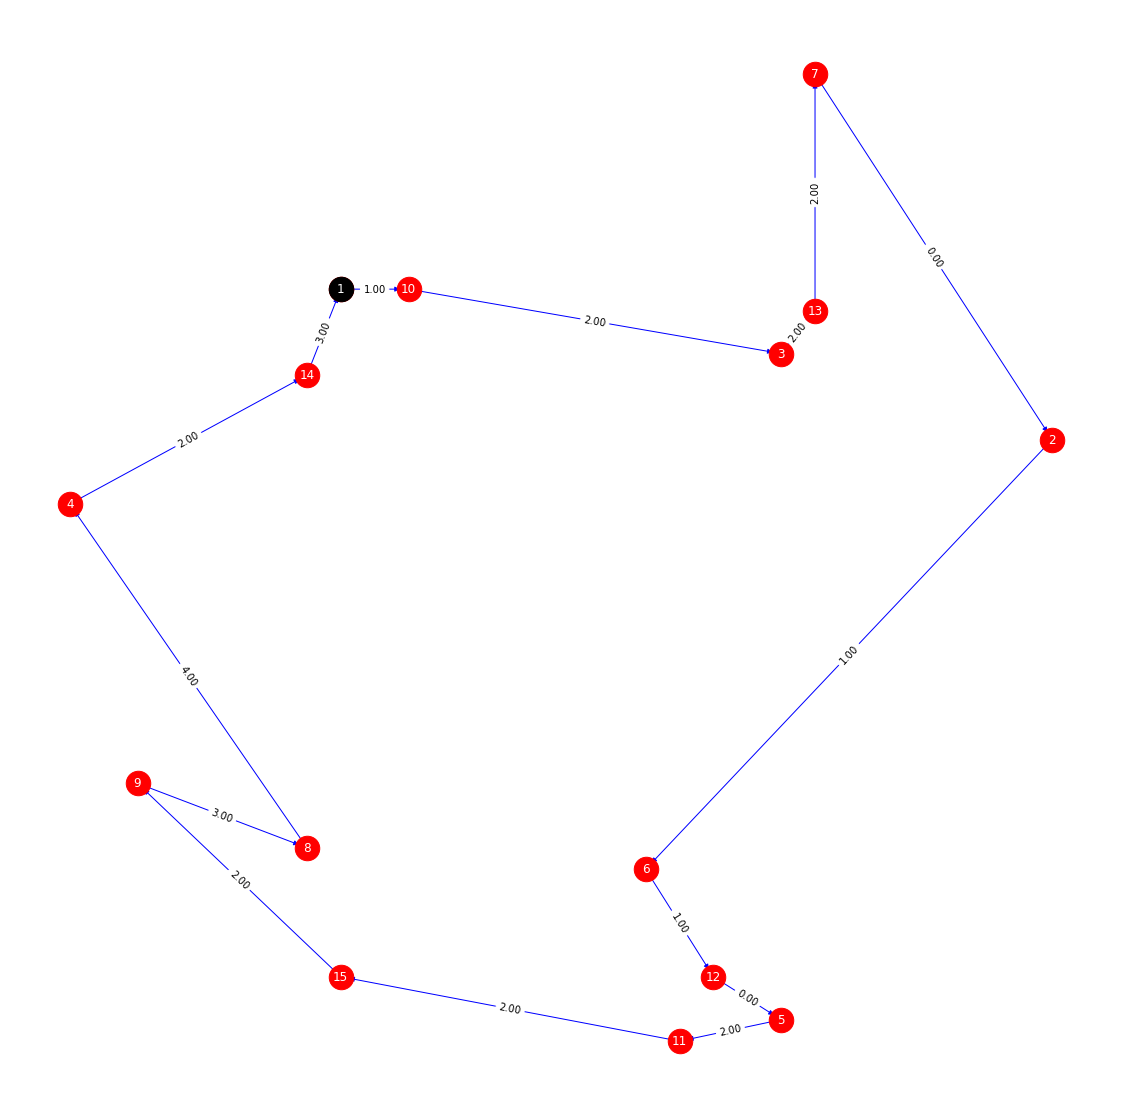

Soluzione pdtsp relativa al prodotto2


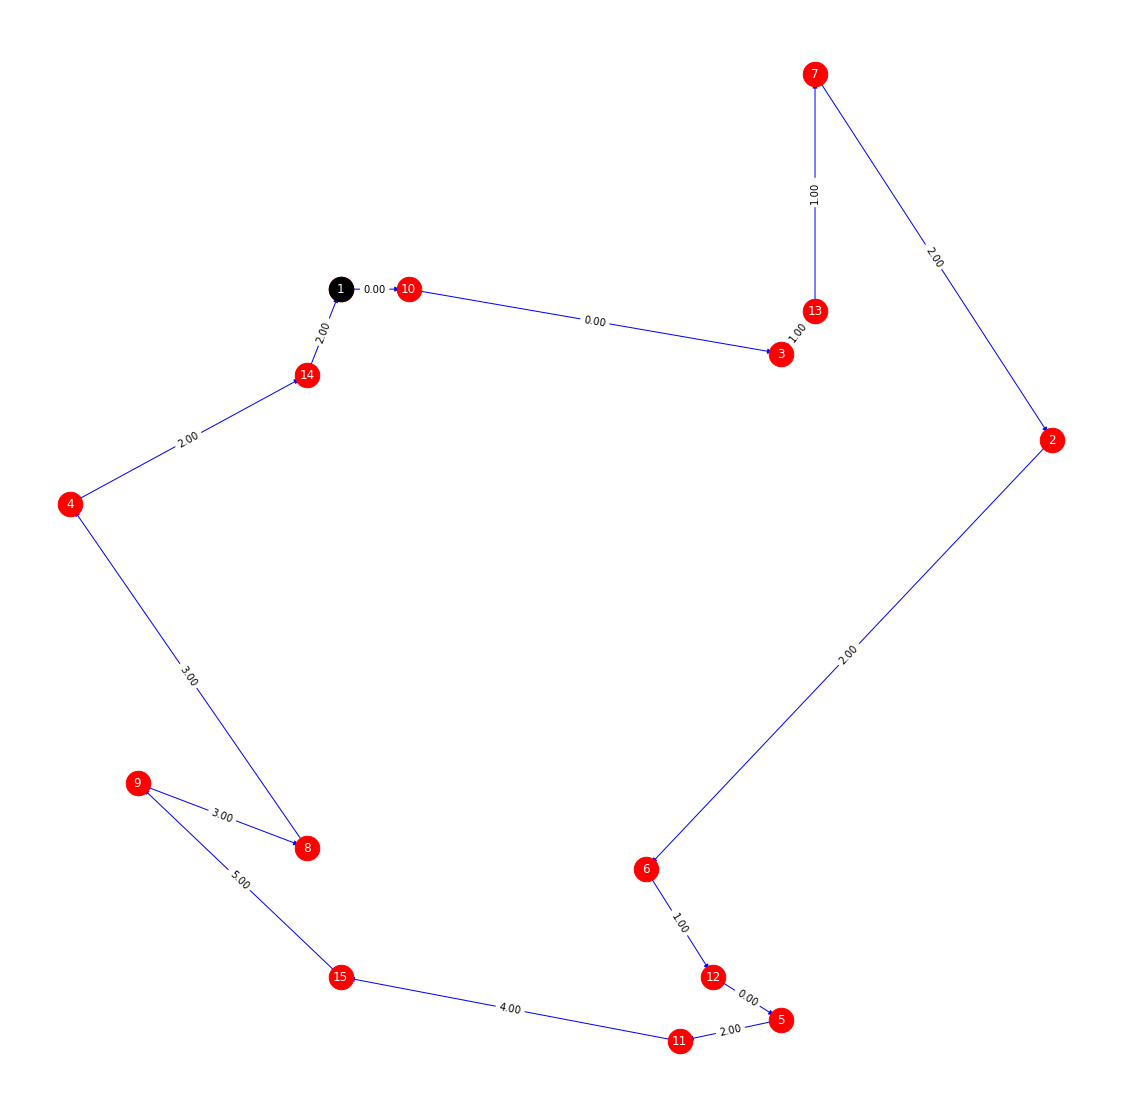

Soluzione pdtsp relativa al prodotto3


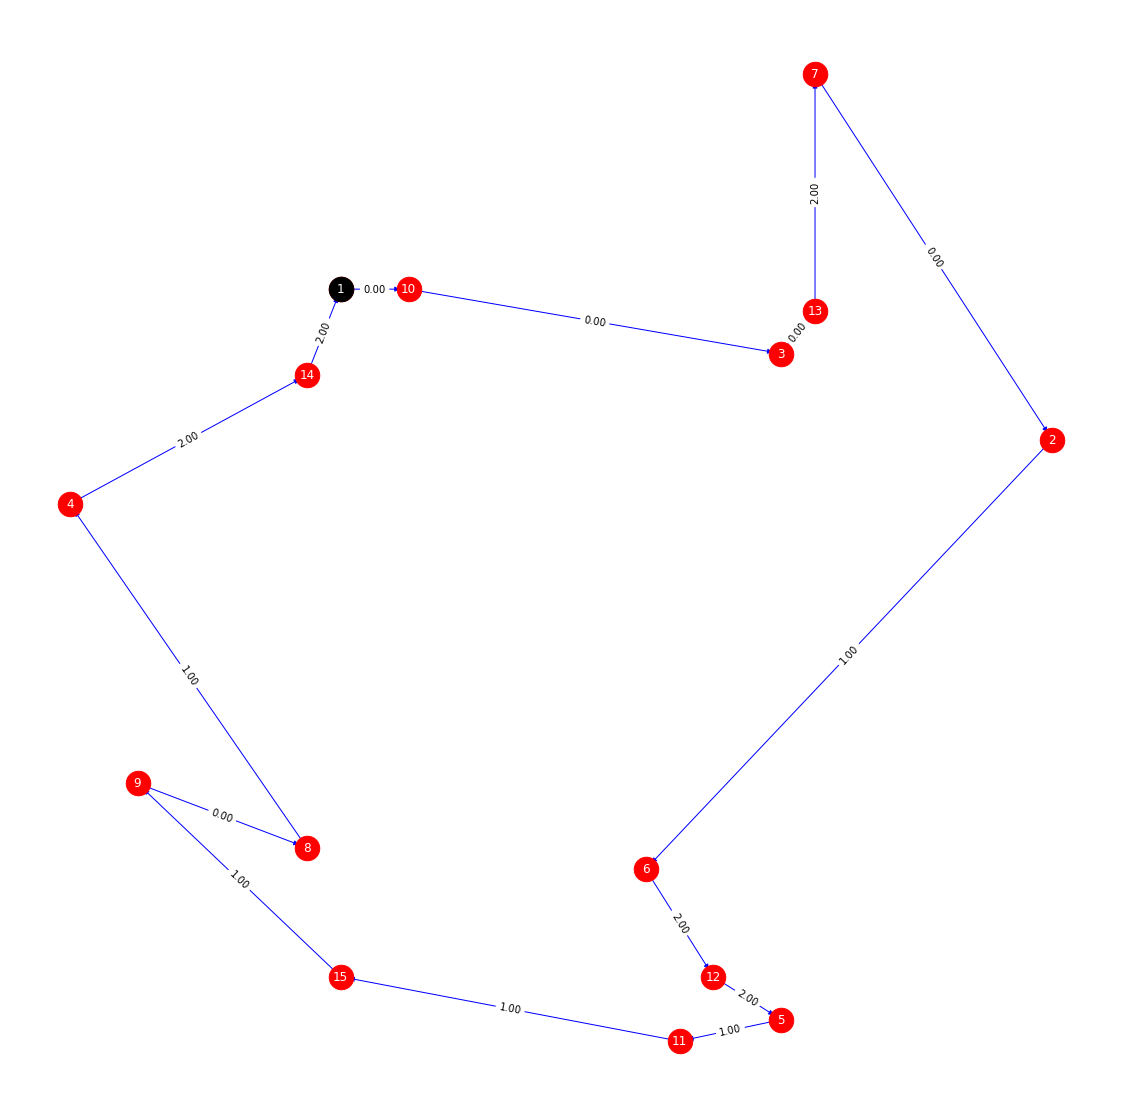

Soluzione pdtsp relativa al prodotto4


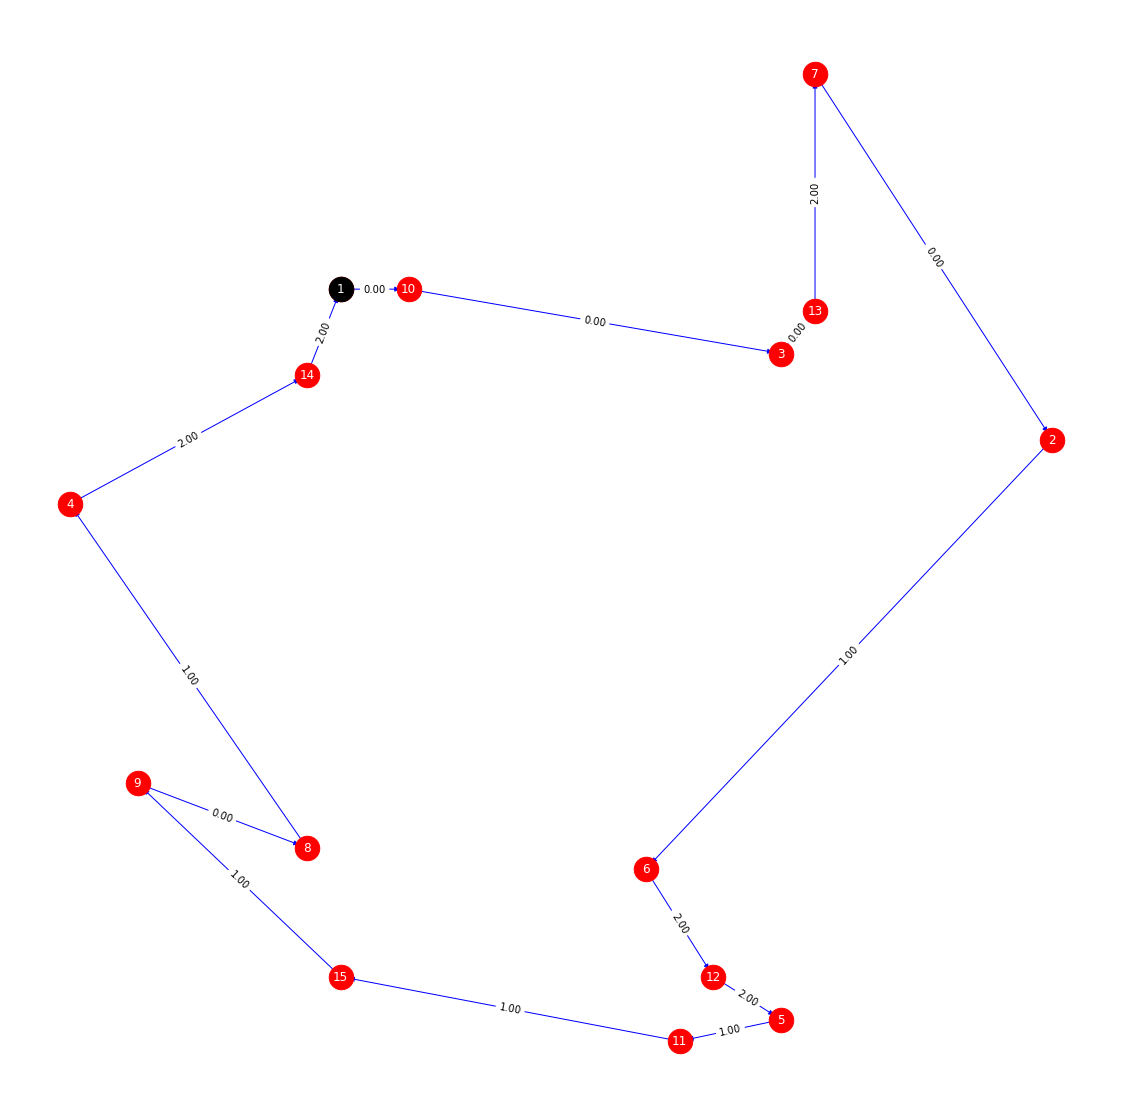

Soluzione pdtsp relativa al prodotto5


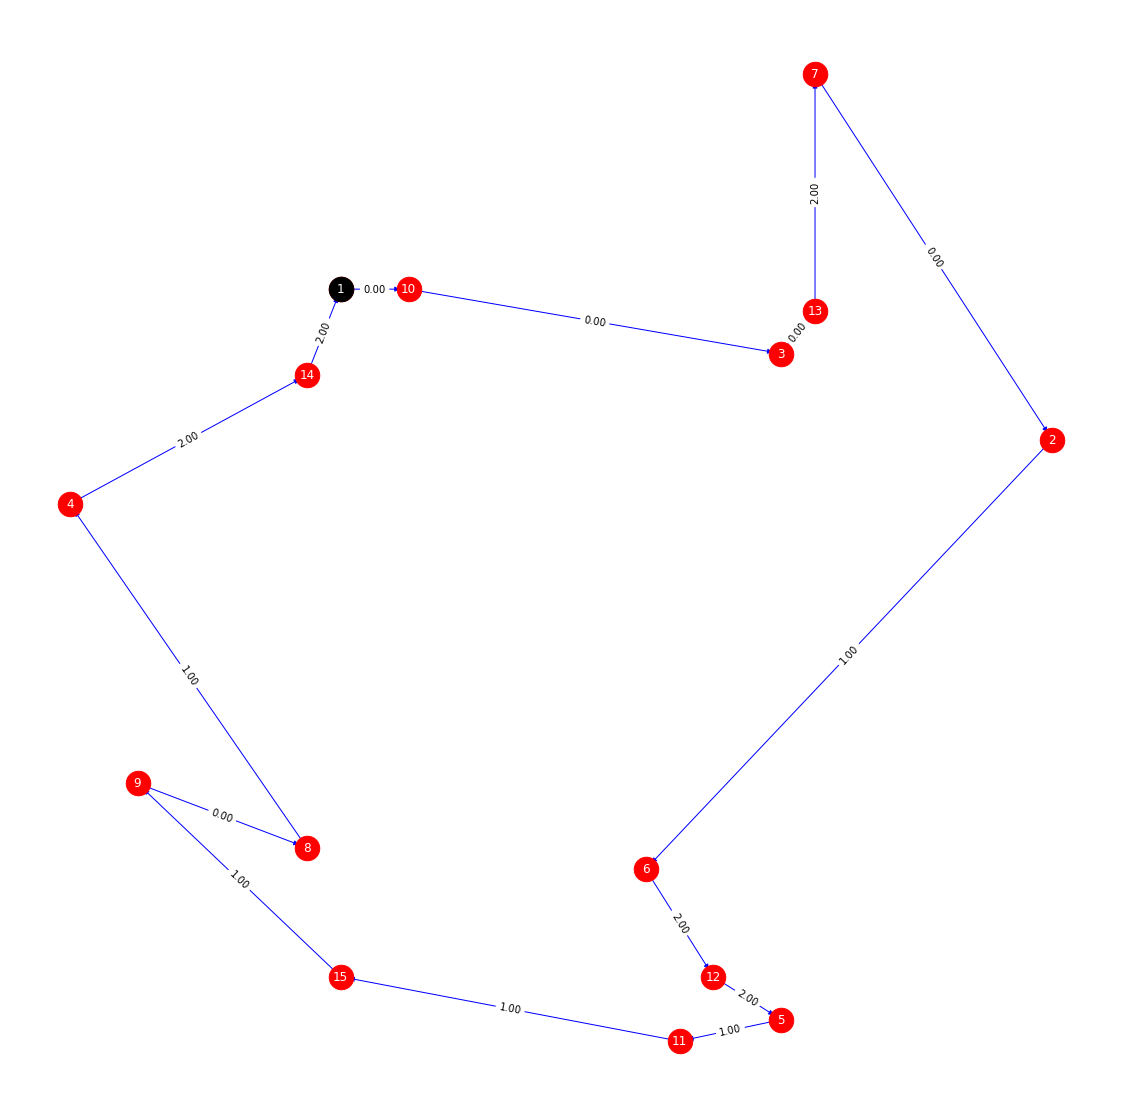

Soluzione pdtsp relativa al prodotto6


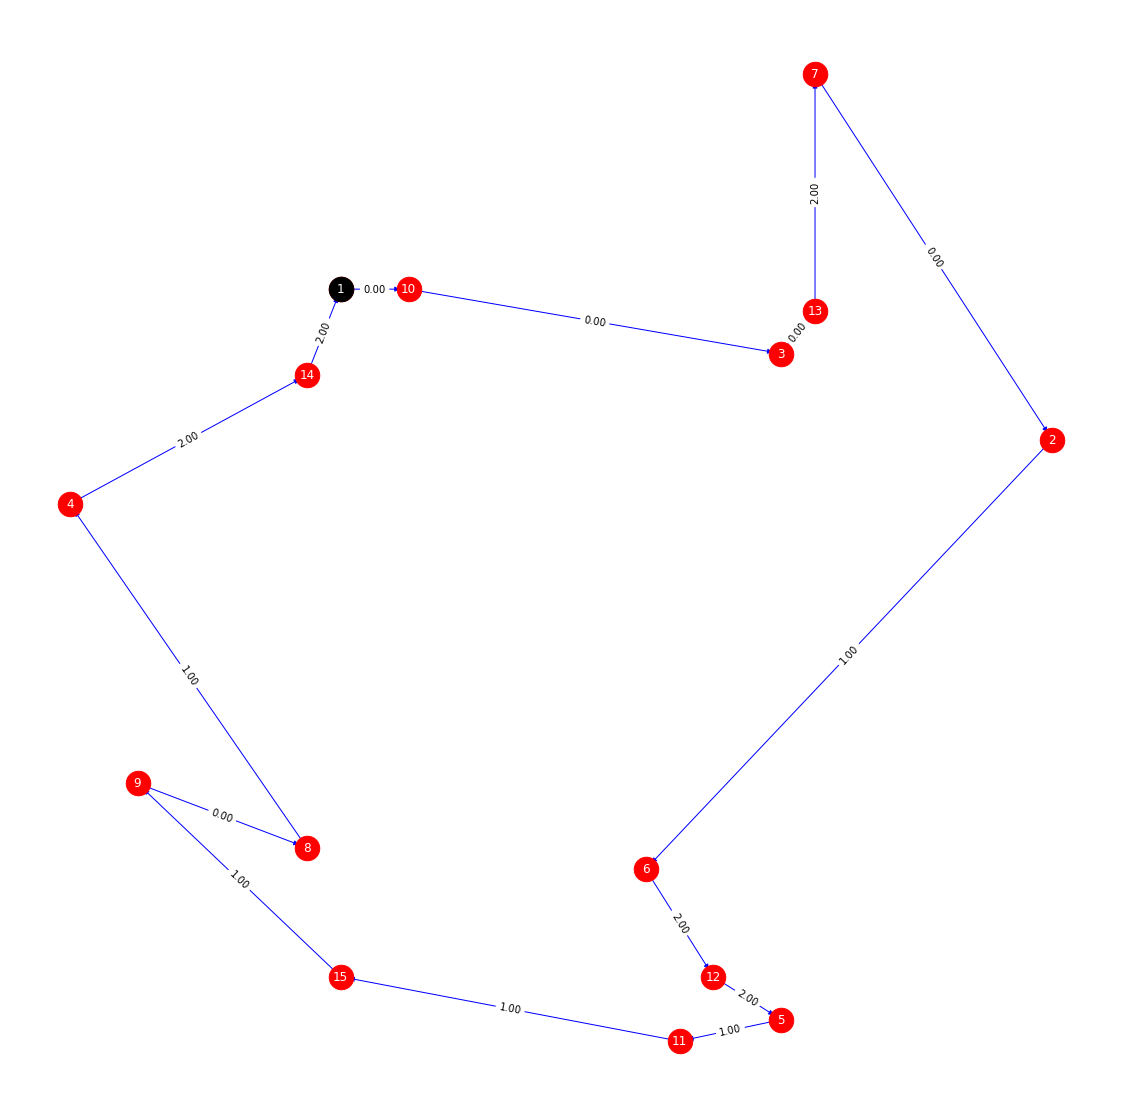

Soluzione pdtsp relativa al prodotto7


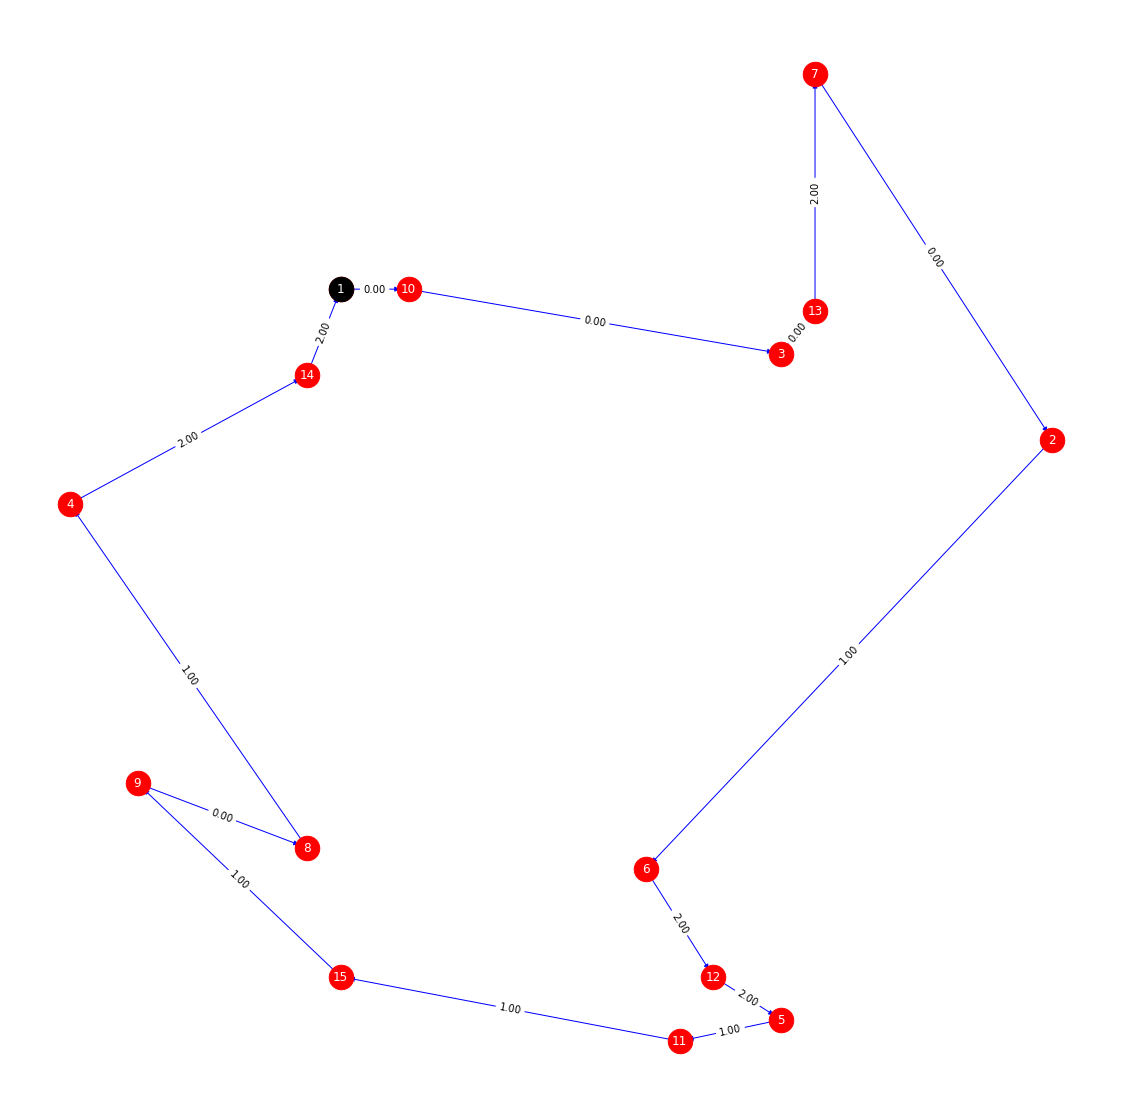

Soluzione pdtsp relativa al prodotto8


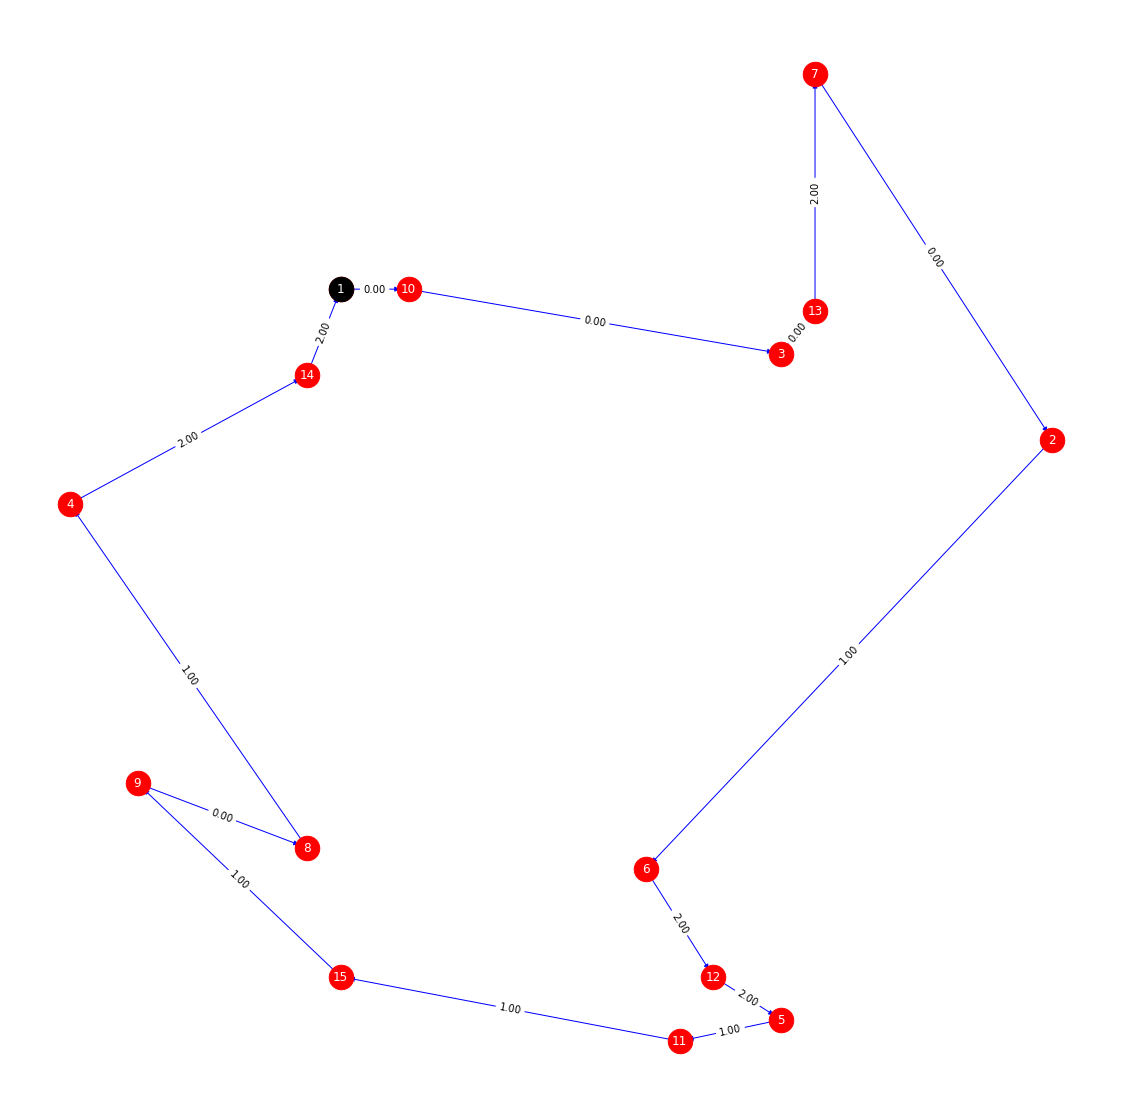

Soluzione pdtsp relativa al prodotto9


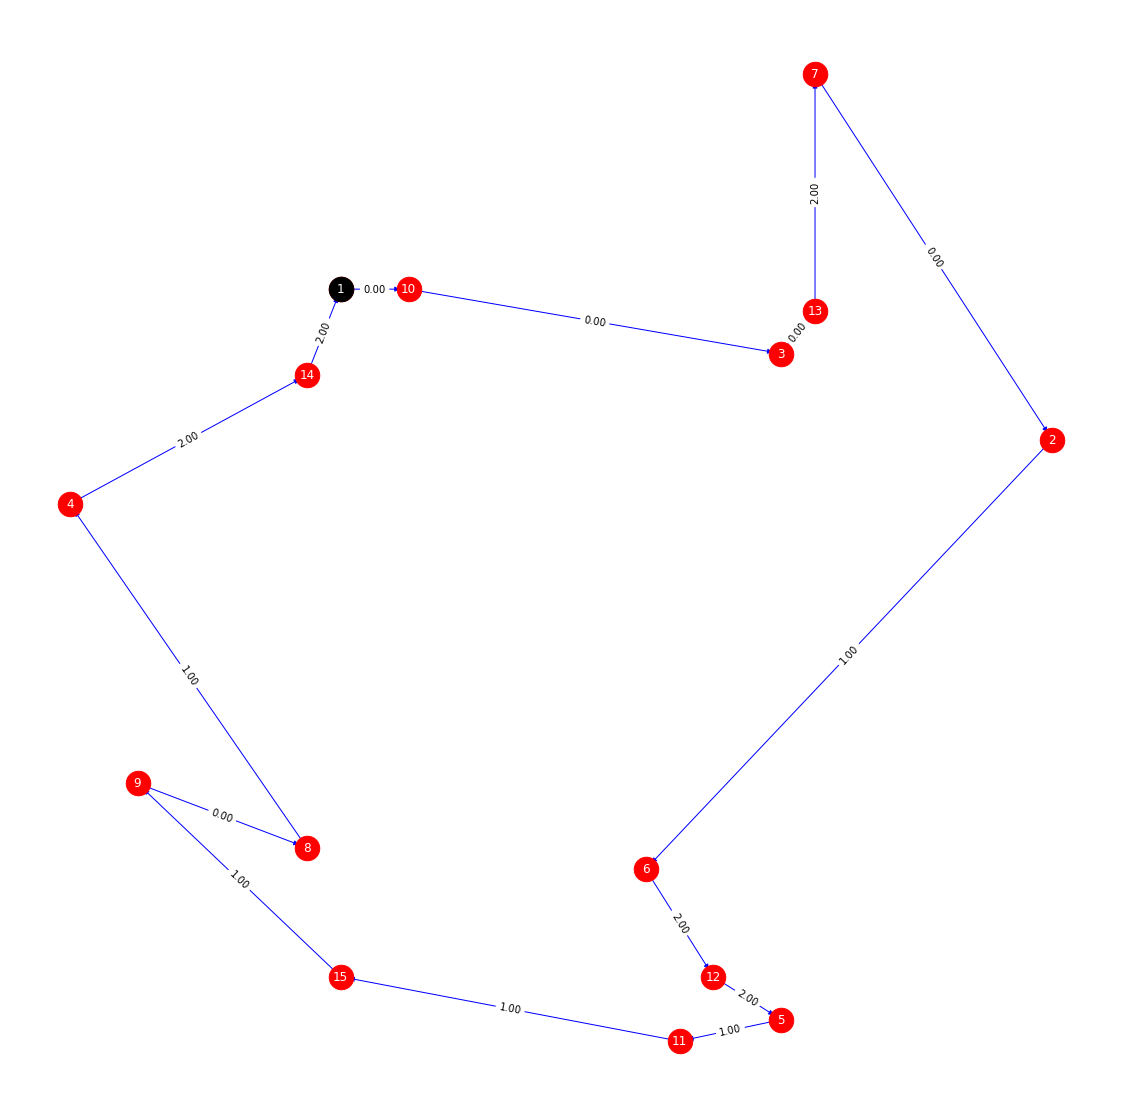

Soluzione pdtsp relativa al prodotto10


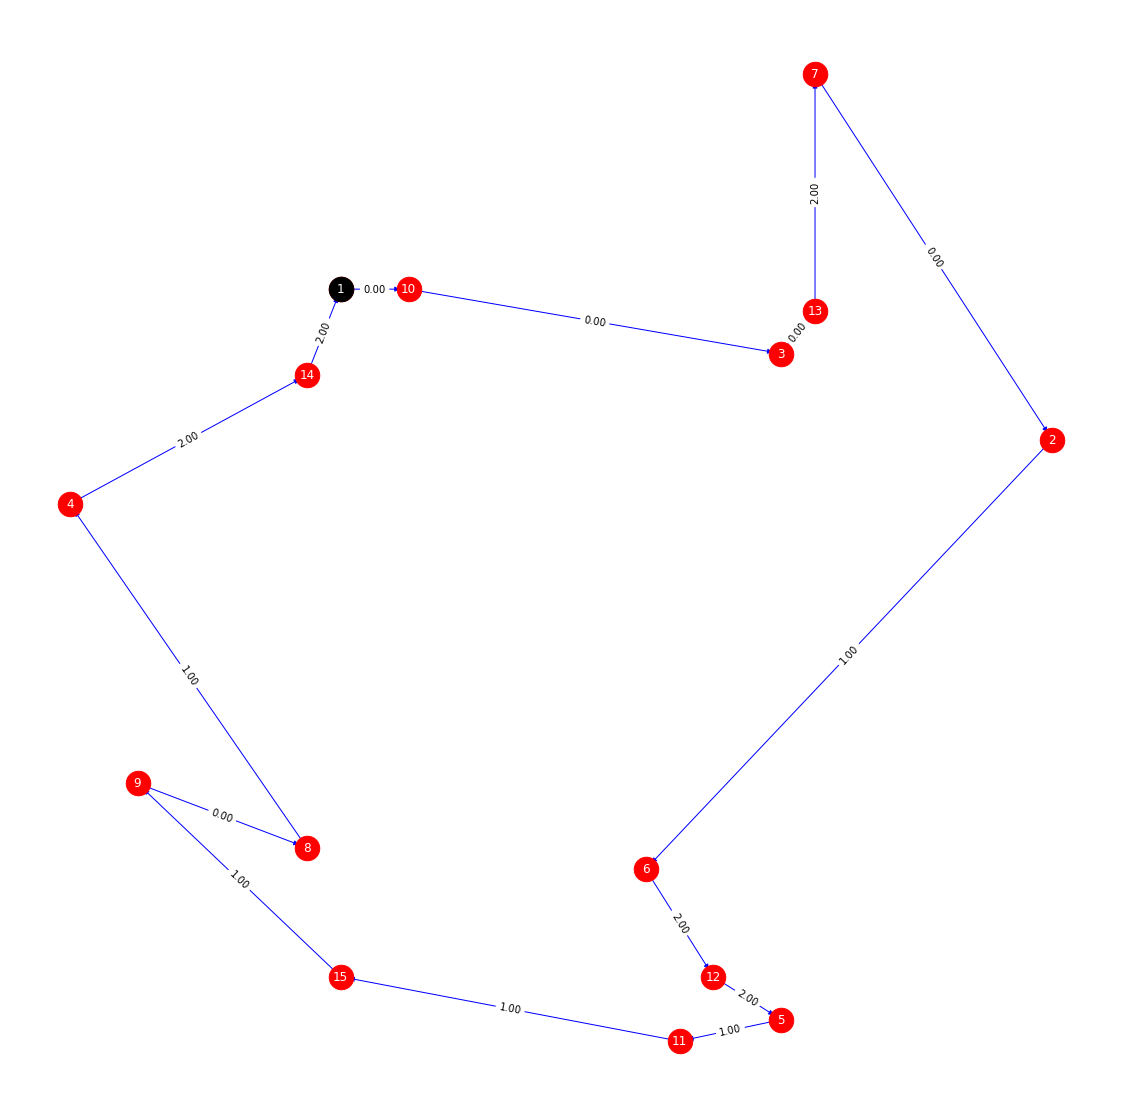

Soluzione pdtsp relativa al prodotto11


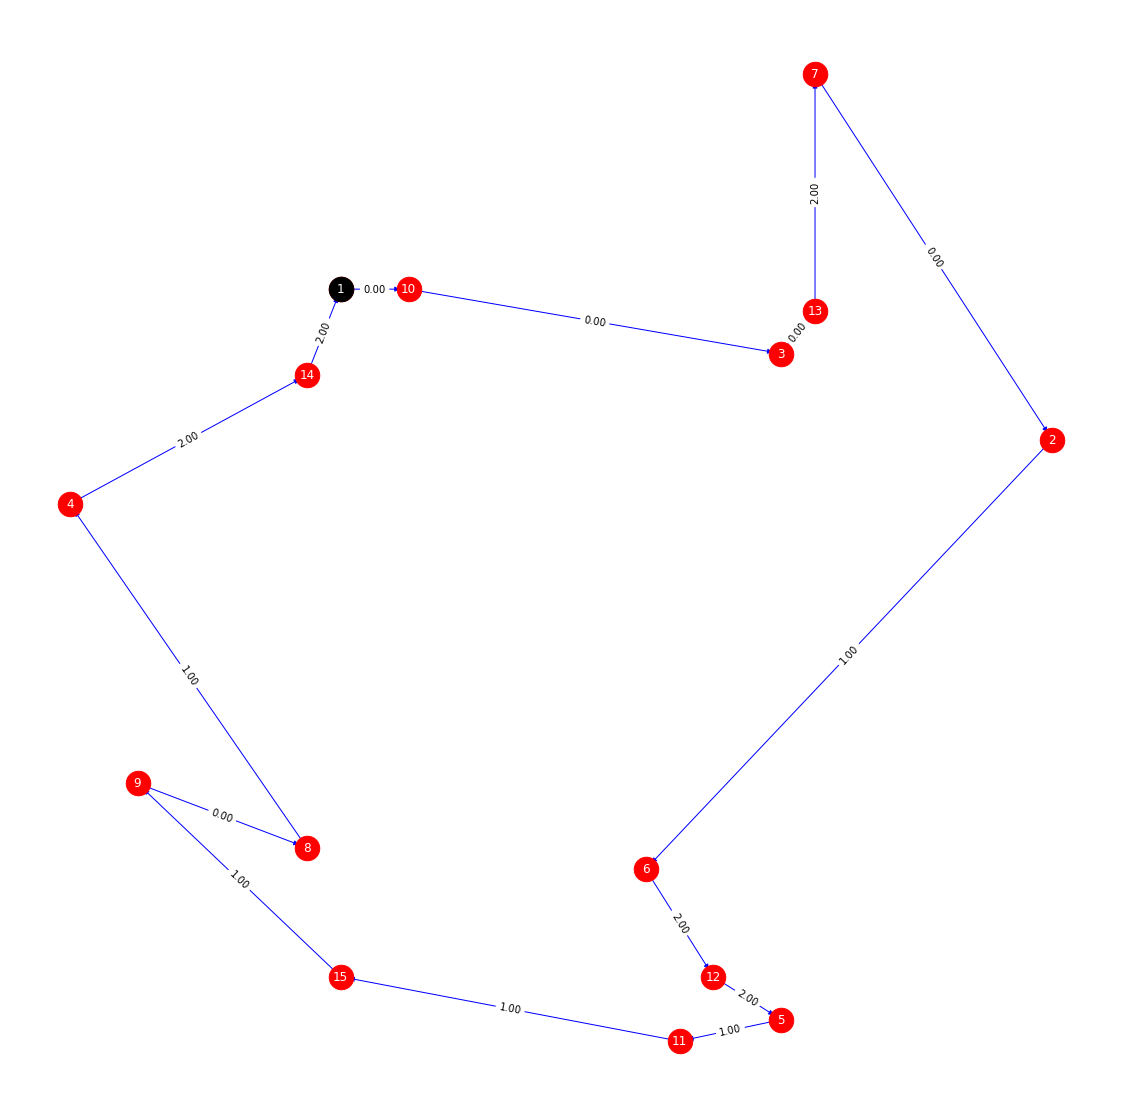

Soluzione pdtsp relativa al prodotto12


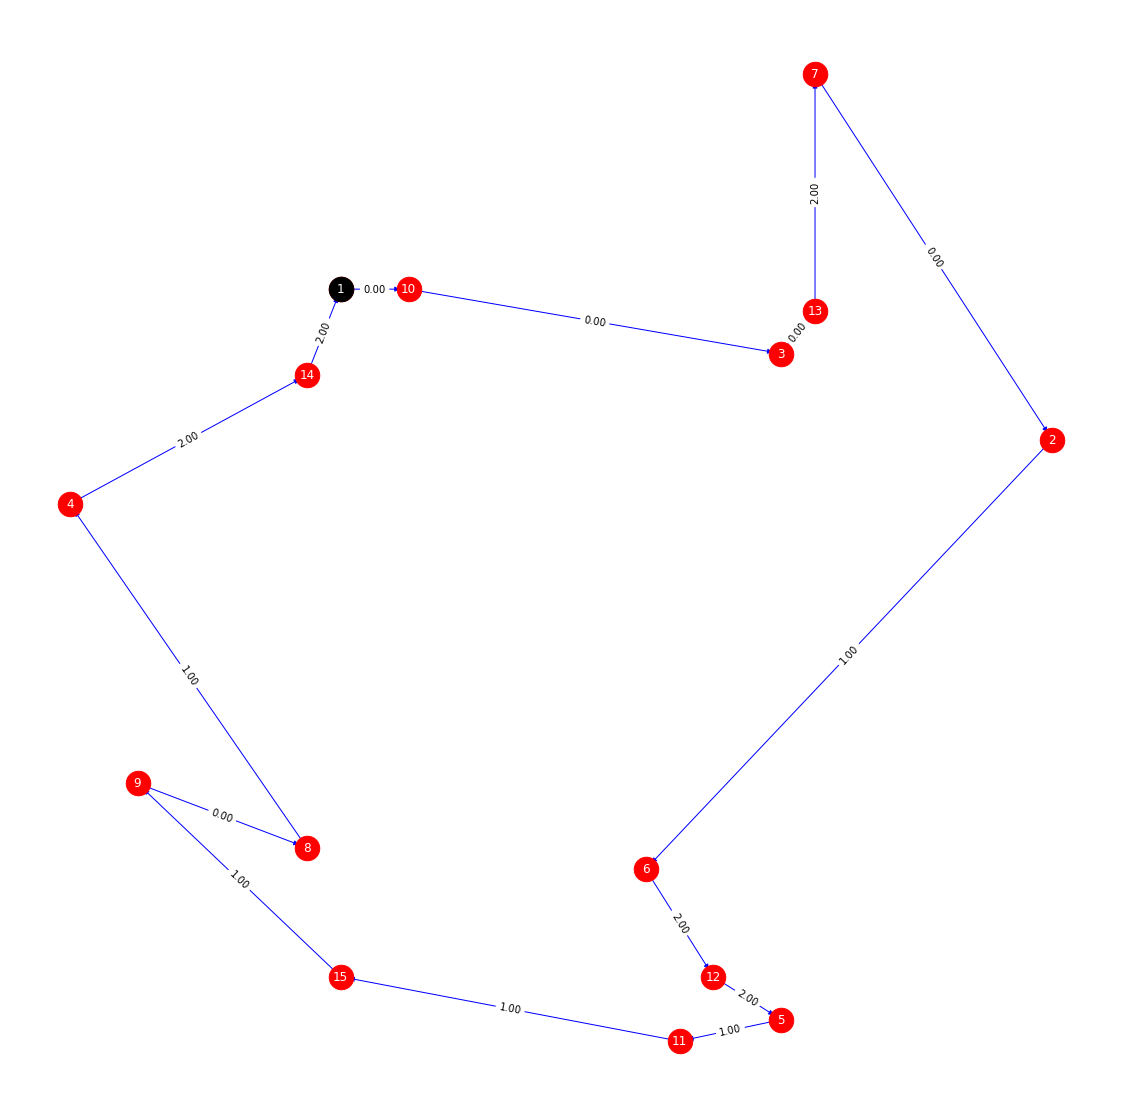

Soluzione pdtsp relativa al prodotto13


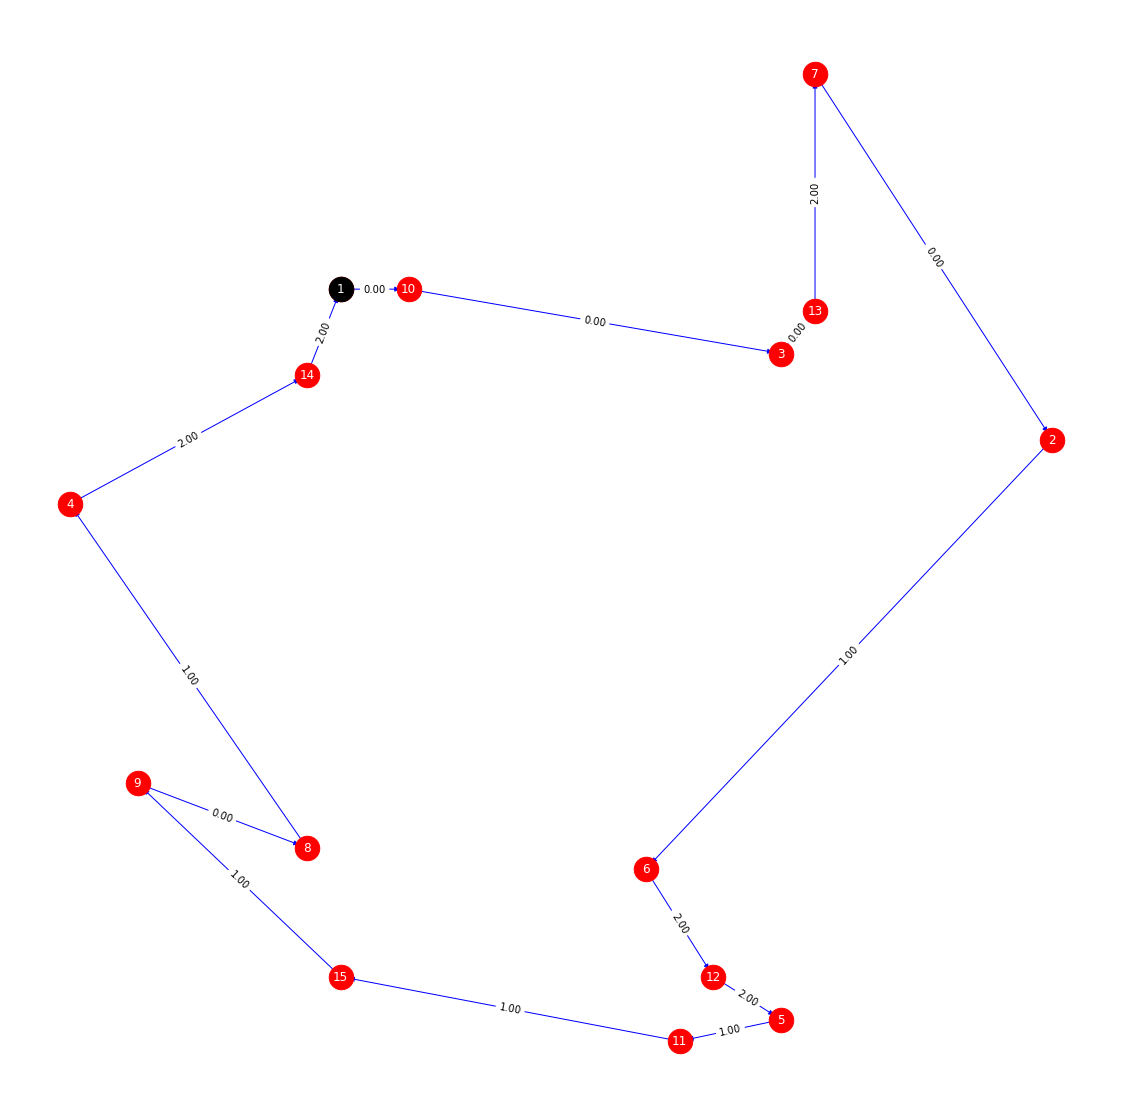

In [25]:
print("Costo del tour con commodities:----->", pdtsp.ObjVal)
for e in products:
    print("Soluzione pdtsp relativa al prodotto" + str(e))
    DrawSolFlow(G,x,f,e)
    

In [ ]:
atsp_mtz = gb.Model()

x1 = atsp_mtz.addVars(G.edges(),\
                 obj=[G[i][j]['dist']\
                      for i,j in G.edges()],\
             vtype=gb.GRB.BINARY, name='x')

u1 = atsp_mtz.addVars(G.nodes(), obj=[0.0 for i in G.nodes()],\
                     lb=2.0, ub=G.number_of_nodes(), vtype=gb.GRB.CONTINUOUS,\
                    name='u')

atsp_mtz.write('atsp_mtz.lp')

atsp_mtz.addConstrs((x1.sum(i,'*') == 1 \
                 for i in G.nodes()), name='FS')

atsp_mtz.update()
atsp_mtz.write('atsp_mtz.lp')

atsp_mtz.addConstrs((x1.sum('*',i) == 1 \
                 for i in G.nodes()), name='RS')

atsp_mtz.update()
atsp_mtz.write('atsp_mtz.lp')

atsp_mtz.addConstrs((x1[i,j] + x1[j,i] <= 1 \
                 for i,j in G.edges() if j > i), name='SEC2')

atsp_mtz.update()
atsp_mtz.write('atsp_mtz.lp')

u1[root].lb = 1.0
u1[root].ub = 1.0

atsp_mtz.addConstrs((u1[i] - u1[j] + (G.number_of_nodes() - 1) * x1[i,j] + \
                   (G.number_of_nodes() - 3) * x1[j,i] <= (G.number_of_nodes() - 2)\
                   for i in G.nodes()\
                    for j in G.nodes()\
                   if (i != j) and (i != 1) and (j !=1 ) and G.has_edge(i,j) and G.has_edge(j,i)), name='MTZ')

atsp_mtz.update()
atsp_mtz.write('atsp_mtz.lp')

atsp_mtz._vars = x1
atsp_mtz._graph = G


def SEC_cut_callback (model, where):

    if where == gb.GRB.Callback.MIPNODE:
        status = model.cbGet(gb.GRB.Callback.MIPNODE_STATUS)
        count = model.cbGet(gb.GRB.Callback.MIPNODE_NODCNT)
        if status == gb.GRB.OPTIMAL and count < 10:
            x = model._vars
            xrel = model.cbGetNodeRel(x) 
            G = model._graph

            for i,j in G.edges():
                G[i][j]['capacity'] = xrel[i,j]

            for i in list(G.nodes())[1:]:
                cut_val, cut = nx.minimum_cut(G,1,i)

                if cut_val < 0.99999:
                    if len(cut[0]) < len(cut[1]):
                        subtour = (list(cut[0]))
                    else:
                        subtour = (list(cut[1]))

                    subtouredges = [(u,v) for u in subtour \
                                for v in subtour if u != v and G.has_edge(u,v)]

                    model.cbCut(gb.quicksum(x[i,j] for i,j in subtouredges) <= len(subtour) - 1)

                    break

atsp_mtz.reset()
atsp_mtz.Params.PreCrush = 1
atsp_mtz.optimize(SEC_cut_callback)

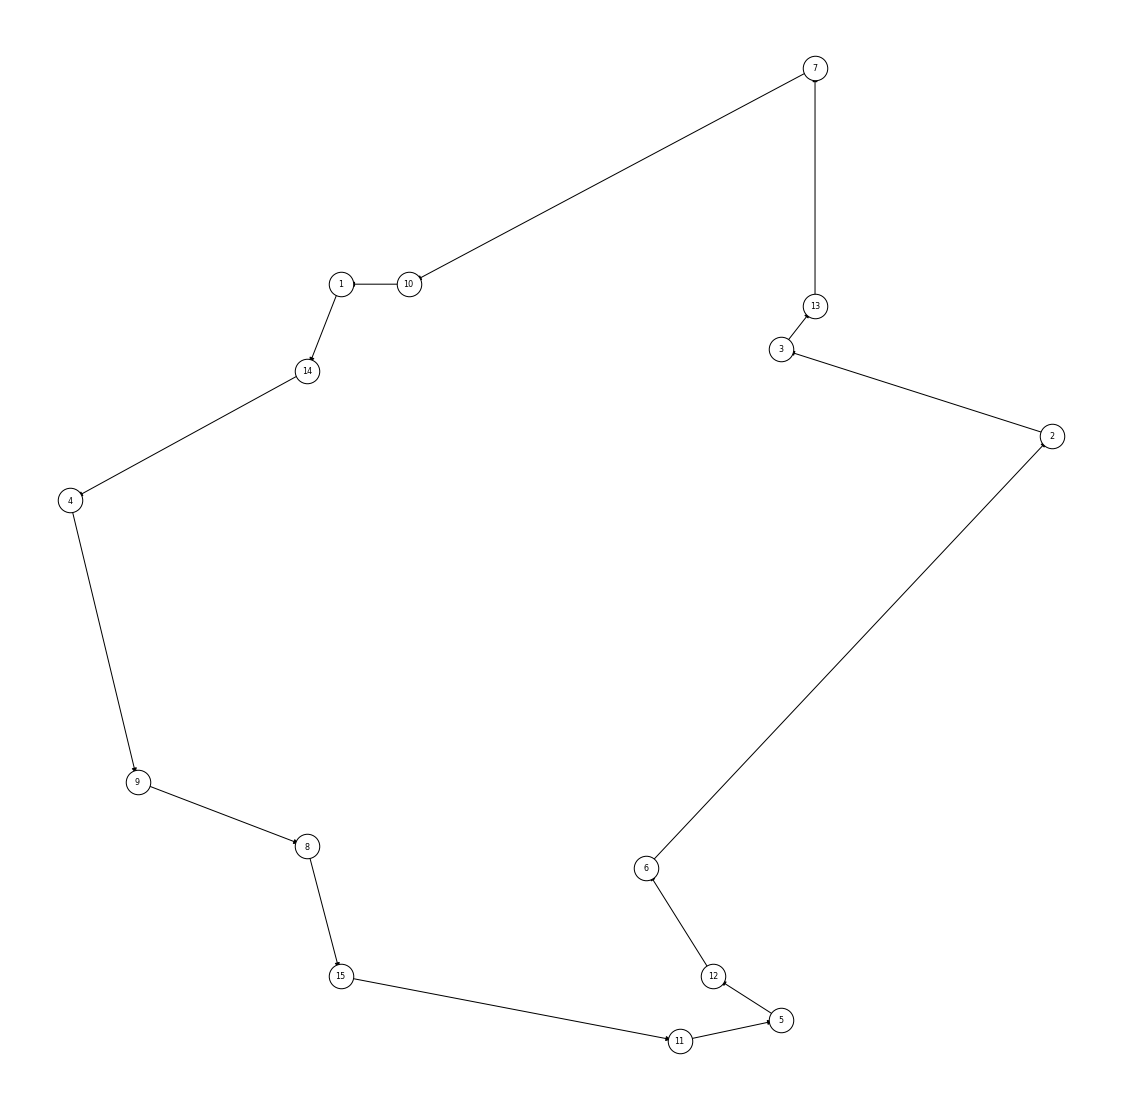

costo del tour ---> 12385.0


In [27]:
DrawSol(G,x1)
print('costo del tour --->', atsp_mtz.objVal)